# 1. Import and Install Dependencies

In [8]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
# Suppress TensorFlow verbose logging
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0=all, 1=info, 2=warnings, 3=errors only

# 2. Keypoints using MP Holistic

In [10]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [11]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

def draw_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_face_mesh.FACEMESH_CONTOURS
        )
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS
        )
        

In [12]:
def draw_styled_landmarks(image, results):
    # Draw face mesh contours
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_face_mesh.FACEMESH_CONTOURS,
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )
    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )
    # Draw left hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    # Draw right hand connections
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

In [13]:
def test_webcam_mediapipe(camera_index=0, min_detection_confidence=0.5, 
                          min_tracking_confidence=0.5, window_name='OpenCV Feed',
                          show_results=False):
    """
    Test MediaPipe Holistic detection on live webcam feed.
    
    This function opens the webcam and continuously processes frames with MediaPipe Holistic,
    displaying the detected landmarks (face, pose, hands) in real-time.
    
    Parameters:
    -----------
    camera_index : int
        Camera device index (default: 0 for default webcam)
    min_detection_confidence : float
        Minimum confidence for MediaPipe detection (default: 0.5)
    min_tracking_confidence : float
        Minimum confidence for MediaPipe tracking (default: 0.5)
    window_name : str
        Name of the display window (default: 'OpenCV Feed')
    show_results : bool
        Whether to print MediaPipe results to console (default: False)
    
    Returns:
    --------
    None
    
    Controls:
    ---------
    - Press 'q' to quit
    
    Example:
    --------
    >>> test_webcam_mediapipe()
    >>> test_webcam_mediapipe(camera_index=1, show_results=True)
    """
    cap = cv2.VideoCapture(camera_index)
    
    if not cap.isOpened():
        print(f"Error: Could not open camera {camera_index}")
        return
    
    print(f"Starting webcam test (Camera {camera_index})")
    print(f"Press 'q' to quit")
    print("-" * 50)
    
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=min_detection_confidence, 
                              min_tracking_confidence=min_tracking_confidence) as holistic:
        while cap.isOpened():
            # Read feed
            ret, frame = cap.read()
            
            if not ret:
                print("Warning: Failed to read frame from camera")
                break

            # Make detections
            image, results = mediapipe_detection(frame, holistic)
            
            if show_results:
                print(results)
            
            # Draw landmarks
            draw_styled_landmarks(image, results)

            # Show to screen
            cv2.imshow(window_name, image)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        
    cap.release()
    cv2.destroyAllWindows()
    print("\n✓ Webcam test complete!")


# Example usage: Test webcam with MediaPipe
test_webcam_mediapipe()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [15]:
len(results.face_landmarks.landmark)

468

In [14]:
results.face_landmarks.landmark

[x: 0.518114746
y: 0.203804672
z: -0.0404382497
, x: 0.516017199
y: 0.135858461
z: -0.0703209415
, x: 0.513707817
y: 0.158170909
z: -0.0376089104
, x: 0.495000124
y: 0.0836026818
z: -0.0535557792
, x: 0.514697969
y: 0.117724992
z: -0.0745844543
, x: 0.511037827
y: 0.0957597941
z: -0.0690677464
, x: 0.500882506
y: 0.0448232815
z: -0.0331096724
, x: 0.39264977
y: 0.0659131259
z: 0.00697755767
, x: 0.495547354
y: 0.0066325888
z: -0.0247049425
, x: 0.493475556
y: -0.0172744095
z: -0.0270229708
, x: 0.483404368
y: -0.109073669
z: -0.0106026232
, x: 0.518820584
y: 0.21341899
z: -0.0385585949
, x: 0.518794894
y: 0.221790507
z: -0.0339429341
, x: 0.518076897
y: 0.226153865
z: -0.0278407354
, x: 0.518792629
y: 0.233740479
z: -0.0247091763
, x: 0.519826889
y: 0.242033646
z: -0.0268433578
, x: 0.520863652
y: 0.253093123
z: -0.0292270854
, x: 0.521441519
y: 0.265057832
z: -0.0265156701
, x: 0.52118814
y: 0.284877628
z: -0.0131468484
, x: 0.515578806
y: 0.146109894
z: -0.0637116283
, x: 0.500232697

In [15]:
frame

array([[[146, 214, 228],
        [146, 214, 228],
        [145, 213, 227],
        ...,
        [ 91,  56,  39],
        [ 95,  58,  43],
        [ 97,  59,  44]],

       [[143, 210, 225],
        [144, 211, 226],
        [143, 210, 225],
        ...,
        [ 99,  62,  42],
        [ 97,  60,  43],
        [ 96,  59,  42]],

       [[149, 214, 226],
        [148, 214, 227],
        [146, 211, 226],
        ...,
        [ 95,  58,  35],
        [ 97,  58,  39],
        [ 96,  57,  38]],

       ...,

       [[ 93,  87,  74],
        [ 93,  87,  71],
        [ 97,  89,  72],
        ...,
        [ 73,  68,  57],
        [ 71,  69,  57],
        [ 69,  67,  56]],

       [[ 93,  88,  71],
        [ 92,  87,  66],
        [ 93,  87,  65],
        ...,
        [ 81,  66,  52],
        [ 79,  66,  53],
        [ 80,  67,  55]],

       [[ 93,  87,  65],
        [ 93,  87,  66],
        [ 94,  88,  68],
        ...,
        [ 79,  64,  48],
        [ 79,  63,  51],
        [ 79,  63,  51]]

In [16]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [17]:
draw_landmarks(frame, results)

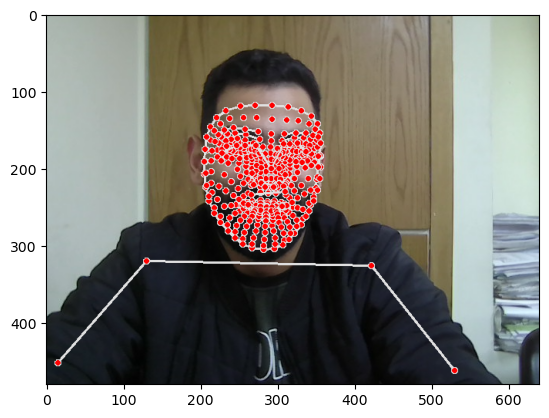

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 2.1 Test MediaPipe with KArSL Video Dataset

In [28]:
def test_mediapipe_on_video(base_path, action_id='0071', display_scale=0.5):
    """
    Test MediaPipe detection on a sample video from KArSL dataset.
    
    Parameters:
    -----------
    base_path : str
        Path to the base directory containing action folders
    action_id : str
        Action folder ID to test (default: '0071')
    display_scale : float
        Scale factor for display window (default: 0.5 for 50% size)
    """
    import glob
    import os
    
    # Get action folder
    test_action_path = os.path.join(base_path, action_id)
    
    # Get first video file
    video_files = glob.glob(os.path.join(test_action_path, '*.mp4')) + \
                  glob.glob(os.path.join(test_action_path, '*.avi')) + \
                  glob.glob(os.path.join(test_action_path, '*.mov'))
    
    if not video_files:
        print(f"No video files found in {test_action_path}")
        print("Make sure the base_path and action_id are correct!")
        return
    
    test_video_path = video_files[0]
    print(f"Testing with video: {test_video_path}")
    print(f"Action folder: {action_id}")
    
    # Open video
    cap = cv2.VideoCapture(test_video_path)
    
    if not cap.isOpened():
        print("Error: Could not open video file!")
        return
    
    print("Video opened successfully!")
    print(f"Total frames: {int(cap.get(cv2.CAP_PROP_FRAME_COUNT))}")
    print(f"FPS: {cap.get(cv2.CAP_PROP_FPS)}")
    print(f"Resolution: {int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))}x{int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))}")
    
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            # Read feed
            ret, frame = cap.read()
            
            if not ret:
                print("End of video or cannot read frame")
                break

            # Make detections
            image, results = mediapipe_detection(frame, holistic)
            
            # Draw landmarks
            draw_styled_landmarks(image, results)
            
            # Resize for display
            display_height, display_width = image.shape[:2]
            display_image = cv2.resize(image, 
                                      (int(display_width * display_scale), 
                                       int(display_height * display_scale)))
            
            # Add text overlay with info
            cv2.putText(display_image, f'Action: {action_id}', (10, 30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(display_image, 'Press Q to quit', (10, 60), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

            # Show to screen
            cv2.imshow('KArSL Video Test - MediaPipe Detection', display_image)

            # Break gracefully (press 'q' to quit)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
        
    cap.release()
    cv2.destroyAllWindows()
    print("✓ Test complete!")


# Example usage:
# test_mediapipe_on_video(r"D:\KArSL-502\01\train\0071-0170", action_id='0071')


In [29]:
test_mediapipe_on_video(r"D:\KArSL-502\01\train\0071-0170", action_id='0071')

Testing with video: D:\KArSL-502\01\train\0071-0170\0071\03_01_0071_(01_12_16_15_52_41)_c.mp4
Action folder: 0071
Video opened successfully!
Total frames: 29
FPS: 30.0
Resolution: 1920x1080
End of video or cannot read frame
✓ Test complete!
End of video or cannot read frame
✓ Test complete!


# 3. Extract Keypoint Values

In [29]:
results.face_landmarks.landmark[0].x

0.5726476907730103

In [30]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [31]:
pose

[array([ 0.5696373 ,  0.45719171, -0.2916106 ,  0.9989664 ]),
 array([ 0.57740581,  0.42978573, -0.26938978,  0.99899173]),
 array([ 0.58307338,  0.42903683, -0.26938385,  0.99909204]),
 array([ 0.58839566,  0.428379  , -0.26931828,  0.99924147]),
 array([ 0.5580343 ,  0.43443045, -0.27182391,  0.99855798]),
 array([ 0.55129093,  0.43663949, -0.27174857,  0.99800456]),
 array([ 0.54501289,  0.43839923, -0.27201214,  0.9978286 ]),
 array([ 0.59658468,  0.44227186, -0.11828987,  0.9992165 ]),
 array([ 0.53789532,  0.45316756, -0.12699097,  0.99838716]),
 array([ 0.5823918 ,  0.48603567, -0.23366125,  0.999421  ]),
 array([ 0.5591597 ,  0.48892179, -0.23671578,  0.99930888]),
 array([ 0.64035356,  0.5946337 , -0.06447414,  0.99958152]),
 array([ 0.5003587 ,  0.60161167, -0.05040625,  0.99909824]),
 array([ 0.6520015 ,  0.78946739, -0.2007321 ,  0.98735309]),
 array([ 0.49535084,  0.81503665, -0.08083374,  0.96470284]),
 array([ 0.57124418,  0.67304194, -0.38793033,  0.9887116 ]),
 array([

In [32]:
len(results.pose_landmarks.landmark)

33

In [33]:
len(pose)

33

In [33]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [34]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [35]:
result_test = extract_keypoints(results)

In [36]:
result_test.shape

(1662,)

In [39]:
result_test

array([ 0.5696373 ,  0.45719171, -0.2916106 , ...,  0.        ,
        0.        ,  0.        ])

In [40]:
np.save('0', result_test)

In [41]:
np.load('0.npy')

array([ 0.5696373 ,  0.45719171, -0.2916106 , ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

## 📊 What does the `load_karsl_dataset_structure()` function do?

This function **scans and organizes your entire KArSL-502 dataset**. Here's what you get:

### 🎯 **Key Outputs:**

1. **`actions`** - Array of 502 action IDs
   - Example: `['0001', '0002', '0003', ..., '0502']`
   - These are the folder names containing videos

2. **`action_names`** - Array of 502 Arabic sign names
   - Example: `['0', '1', '2', ..., 'هيكل عظمي', 'جمجة', ...]`
   - Arabic names for each sign from the Excel file

3. **`sign_mapping`** - Dictionary mapping IDs to Arabic names
   - Example: `{'0071': 'هيكل عظمي', '0072': 'جمجة', ...}`
   - Quick lookup: action ID → Arabic sign name

4. **`video_paths_by_action`** - Dictionary of all video locations
   - Maps each action to ALL folders where it appears
   - Example: `{'0001': ['D:\KArSL-502\01\test\...', 'D:\KArSL-502\02\train\...', ...]}`
   - Each action appears in ~6 locations (3 persons × 2 splits)

5. **`labels_df`** - Full Excel data as pandas DataFrame
   - Contains SignID, Sign-Arabic, Sign-English columns
   - All 502 rows of label information

### 📁 **What the function discovered:**
- **502 unique sign language actions** across your dataset
- **~2,942 physical folders** containing videos (502 actions × ~6 locations each)
- Videos are organized by:
  - **Person**: 01, 02, 03 (3 different signers)
  - **Split**: train, test (2 datasets)
  - **Action**: 0001-0502 (502 different signs)

### 💡 **Why is this useful?**
- You can now **loop through all actions** and process videos from ALL persons and splits
- You have **Arabic names** for displaying predictions (not just numbers!)
- The `video_paths_by_action` dictionary lets you find **every video** for each sign

In [42]:
#!pip install openpyxl

In [64]:
def load_karsl_dataset_structure(karsl_root, output_path='MP_Data_KArSL', sequence_length=30, show_summary=True):
    """
    Load and organize the KArSL-502 dataset structure.
    
    This function:
    1. Reads the labels Excel file to get sign names in Arabic
    2. Scans all persons (01, 02, 03) and splits (train, test)
    3. Creates mappings between action IDs and their locations
    4. Returns organized data structures for processing
    
    Parameters:
    -----------
    karsl_root : str
        Path to the KArSL-502 dataset root directory
    output_path : str
        Path where processed keypoints will be saved (default: 'MP_Data_KArSL')
    sequence_length : int
        Number of frames to extract from each video (default: 30)
    show_summary : bool
        Whether to print dataset summary (default: True)
    
    Returns:
    --------
    dict : Dictionary containing:
        - 'actions': numpy array of action IDs (e.g., ['0001', '0002', ...])
        - 'action_names': numpy array of Arabic sign names
        - 'sign_mapping': dict mapping action IDs to Arabic names
        - 'video_paths_by_action': dict mapping action IDs to list of folder paths
        - 'data_path': path where processed data will be saved
        - 'sequence_length': number of frames per sequence
        - 'labels_df': pandas DataFrame with full label data
    """
    import pandas as pd
    
    # Setup paths
    labels_path = os.path.join(karsl_root, 'KARSL-502_Labels.xlsx')
    data_path = os.path.join(output_path)
    
    # Load labels from Excel file
    labels_df = pd.read_excel(labels_path)
    
    if show_summary:
        print("Labels DataFrame columns:", labels_df.columns.tolist())
        print("\nFirst few rows:")
        print(labels_df.head())
        print("\nSample rows with Arabic text:")
        print(labels_df[70:75])
    
    # Create mapping from SignID (formatted as 4-digit string) to Arabic sign name
    # SignID column contains integers (1, 2, 3, ..., 502)
    # Sign-Arabic column contains the Arabic sign names
    sign_mapping = dict(zip(
        labels_df['SignID'].astype(str).str.zfill(4),  # Convert SignID to 4-digit strings: 0001, 0002, ...
        labels_df['Sign-Arabic']  # Use Arabic sign names
    ))
    
    if show_summary:
        print(f"\nCreated mapping for {len(sign_mapping)} signs")
        print(f"\nSample mapping (numbers):")
        for k, v in list(sign_mapping.items())[:5]:
            print(f"  {k} -> {v}")
        print(f"\nSample mapping (Arabic signs):")
        for k, v in list(sign_mapping.items())[70:75]:
            print(f"  {k} -> {v}")
    
    # Get all person folders (01, 02, 03) and dataset splits (train, test)
    person_folders = ['01', '02', '03']
    dataset_splits = ['train', 'test']
    
    # Collect all action folders and their paths from all persons and splits
    all_action_folders = set()
    video_paths_by_action = {}  # Maps action_id (4-digit folder name) to list of paths containing videos
    
    for person in person_folders:
        for split in dataset_splits:
            # Check all possible action range folders (e.g., 0001-0100, 0071-0170, etc.)
            person_split_path = os.path.join(karsl_root, person, split)
            
            if os.path.exists(person_split_path):
                # Get all subdirectories in this path (these are action range folders)
                for range_folder in os.listdir(person_split_path):
                    range_path = os.path.join(person_split_path, range_folder)
                    
                    if os.path.isdir(range_path):
                        # Get all action folders within this range
                        for action_folder in os.listdir(range_path):
                            action_path = os.path.join(range_path, action_folder)
                            
                            if os.path.isdir(action_path):
                                all_action_folders.add(action_folder)
                                
                                # Store path for this action
                                if action_folder not in video_paths_by_action:
                                    video_paths_by_action[action_folder] = []
                                video_paths_by_action[action_folder].append(action_path)
    
    # Convert to sorted array
    actions = np.array(sorted(list(all_action_folders)))  # This contains 4-digit folder IDs like '0071', '0162', etc.
    action_names = np.array([sign_mapping.get(folder, f'Unknown-{folder}') for folder in actions])  # Map to Arabic names
    
    if show_summary:
        print(f"\n{'='*70}")
        print(f"DATASET SUMMARY")
        print(f"{'='*70}")
        print(f"Found {len(actions)} unique action classes across all persons and splits")
        print(f"\nFirst 10 actions:")
        for i in range(min(10, len(actions))):
            print(f"  {actions[i]} -> {action_names[i]}")
        
        # Show statistics about the dataset structure
        total_action_folders = sum(len(paths) for paths in video_paths_by_action.values())
        print(f"\n{'='*70}")
        print(f"FOLDER ORGANIZATION")
        print(f"{'='*70}")
        print(f"Total action folders across all persons/splits: {total_action_folders}")
        print(f"  This means: {total_action_folders} physical folders containing videos")
        print(f"  Each action appears in: {total_action_folders / len(actions):.1f} folders on average")
        print(f"  (because each action is recorded by 3 persons × 2 splits = 6 folders)")
        print(f"\nExample - Action '{actions[0]}' ({action_names[0]}):")
        print(f"  Found in {len(video_paths_by_action[actions[0]])} locations:")
        for path in video_paths_by_action[actions[0]]:
            print(f"    - {path}")
    
    # Return all important variables as a dictionary
    return {
        'actions': actions,
        'action_names': action_names,
        'sign_mapping': sign_mapping,
        'video_paths_by_action': video_paths_by_action,
        'data_path': data_path,
        'sequence_length': sequence_length,
        'labels_df': labels_df
    }


# Example usage: Load the dataset structure
KARSL_ROOT = r'D:\KArSL-502'
DATA_PATH = os.path.join('MP_Data_KArSL')

# Call the function to load everything
dataset_info = load_karsl_dataset_structure(KARSL_ROOT, output_path=DATA_PATH, sequence_length=30)

# Extract variables for use in other cells
actions = dataset_info['actions']
action_names = dataset_info['action_names']
sign_mapping = dataset_info['sign_mapping']
video_paths_by_action = dataset_info['video_paths_by_action']
DATA_PATH = dataset_info['data_path']
sequence_length = dataset_info['sequence_length']
labels_df = dataset_info['labels_df']

Labels DataFrame columns: ['SignID', 'Sign-Arabic', 'Sign-English']

First few rows:
   SignID Sign-Arabic Sign-English
0       1           0            0
1       2           1            1
2       3           2            2
3       4           3            3
4       5           4            4

Sample rows with Arabic text:
    SignID Sign-Arabic        Sign-English
70      71   هيكل عظمي            Skeleton
71      72        جمجة               skull
72      73   عمود فقري            Backbone
73      74    قفص صدري               Chest
74      75  جهاز تنفسي  Respiratory device

Created mapping for 502 signs

Sample mapping (numbers):
  0001 -> 0
  0002 -> 1
  0003 -> 2
  0004 -> 3
  0005 -> 4

Sample mapping (Arabic signs):
  0071 -> هيكل عظمي
  0072 -> جمجة
  0073 -> عمود فقري
  0074 -> قفص صدري
  0075 -> جهاز تنفسي

DATASET SUMMARY
Found 502 unique action classes across all persons and splits

First 10 actions:
  0001 -> 0
  0002 -> 1
  0003 -> 2
  0004 -> 3
  0005 -> 4
  0006 -> 5
 

In [66]:
def explore_action_folder(actions, action_names, video_paths_by_action, action_index=70, 
                          show_comparison=True, num_comparison_actions=10):
    """
    Explore and display information about a specific action folder from the dataset.
    
    This function helps you inspect the dataset structure by showing:
    - Action ID and Arabic name for a selected action
    - Path where the action videos are stored
    - Number of video files in that action folder
    - Sample filenames
    - Optional comparison with other actions (numbers vs Arabic signs)
    
    Parameters:
    -----------
    actions : numpy.ndarray
        Array of action IDs (e.g., ['0001', '0002', ...])
    action_names : numpy.ndarray
        Array of action names in Arabic
    video_paths_by_action : dict
        Dictionary mapping action IDs to list of folder paths
    action_index : int
        Index of the action to explore (default: 70 for Arabic sign)
    show_comparison : bool
        Whether to show comparison between number and Arabic signs (default: True)
    num_comparison_actions : int
        Number of actions to show in comparison (default: 10)
    
    Returns:
    --------
    dict : Dictionary containing:
        - 'action_id': The action ID (e.g., '0071')
        - 'action_name': The Arabic name of the action
        - 'path': Path to the action folder
        - 'num_files': Number of video files found
        - 'sample_files': List of sample filenames (first 5)
    """
    # Get action information
    sample_action = actions[action_index]
    sample_name = action_names[action_index]
    
    # Use the first path where this action exists
    sample_path = video_paths_by_action[sample_action][0]
    
    print(f"Exploring action ID: {sample_action}")
    print(f"Action name: {sample_name}")
    print(f"Path: {sample_path}")
    
    # List files in the sample action folder
    num_files = 0
    sample_files = []
    
    if os.path.exists(sample_path):
        files = os.listdir(sample_path)
        num_files = len(files)
        sample_files = files[:5]
        print(f"Number of files: {num_files}")
        print(f"Sample files: {sample_files}")
    else:
        print("Path does not exist!")
    
    # Show comparison if requested
    if show_comparison:
        print("\n" + "="*70)
        print(f"For comparison, here are the first {num_comparison_actions} actions (number signs):")
        for i in range(min(num_comparison_actions, len(actions))):
            print(f"  {actions[i]} -> {action_names[i]}")
        
        print(f"\nAnd here are actions {action_index}-{action_index+5} (Arabic word signs):")
        for i in range(action_index, min(action_index + 5, len(actions))):
            print(f"  {actions[i]} -> {action_names[i]}")
    
    # Return summary dictionary
    return {
        'action_id': sample_action,
        'action_name': sample_name,
        'path': sample_path,
        'num_files': num_files,
        'sample_files': sample_files
    }


# Example usage: Explore action at index 70 (Arabic word sign)
result = explore_action_folder(
    actions, 
    action_names, 
    video_paths_by_action, 
    action_index=70,
    show_comparison=True
)


Exploring action ID: 0071
Action name: هيكل عظمي
Path: D:\KArSL-502\01\train\0071-0170\0071
Number of files: 43
Sample files: ['03_01_0071_(01_12_16_15_52_41)_c.mp4', '03_01_0071_(01_12_16_15_52_44)_c.mp4', '03_01_0071_(01_12_16_15_52_49)_c.mp4', '03_01_0071_(01_12_16_15_52_53)_c.mp4', '03_01_0071_(01_12_16_15_52_58)_c.mp4']

For comparison, here are the first 10 actions (number signs):
  0001 -> 0
  0002 -> 1
  0003 -> 2
  0004 -> 3
  0005 -> 4
  0006 -> 5
  0007 -> 6
  0008 -> 7
  0009 -> 8
  0010 -> 9

And here are actions 70-75 (Arabic word signs):
  0071 -> هيكل عظمي
  0072 -> جمجة
  0073 -> عمود فقري
  0074 -> قفص صدري
  0075 -> جهاز تنفسي


In [54]:
# Display action ID to name mapping
print("Action ID -> Action Name Mapping:")
print("=" * 50)
for action_id, action_name in zip(actions[:20], action_names[:20]):  # Show first 20
    print(f"{action_id} -> {action_name}")
print(f"\n... and {len(actions) - 20} more actions")

Action ID -> Action Name Mapping:
0001 -> 0
0002 -> 1
0003 -> 2
0004 -> 3
0005 -> 4
0006 -> 5
0007 -> 6
0008 -> 7
0009 -> 8
0010 -> 9
0011 -> 10
0012 -> 20
0013 -> 30
0014 -> 40
0015 -> 50
0016 -> 60
0017 -> 70
0018 -> 80
0019 -> 90
0020 -> 100

... and 482 more actions


In [67]:
def count_videos_by_action(actions, video_paths_by_action, show_sample=True, sample_size=10):
    """
    Count video files for each action across all persons and splits.
    
    This function scans all video folders for each action and counts the total
    number of video files (.mp4, .avi, .mov) across all locations (persons and splits).
    
    Parameters:
    -----------
    actions : numpy.ndarray
        Array of action IDs (e.g., ['0001', '0002', ...])
    video_paths_by_action : dict
        Dictionary mapping action IDs to list of folder paths containing videos
    show_sample : bool
        Whether to show sample counts for individual actions (default: True)
    sample_size : int
        Number of sample actions to display (default: 10)
    
    Returns:
    --------
    dict : Dictionary containing:
        - 'total_videos': Total number of video files across all actions
        - 'action_video_counts': Dict mapping action_id -> video count
        - 'average_per_action': Average number of videos per action
        - 'min_count': Minimum video count for any action
        - 'max_count': Maximum video count for any action
    """
    import glob
    
    total_videos = 0
    action_video_counts = {}  # Maps action_id -> total video count across all locations
    
    for action in actions:
        # Get all paths where this action exists (across persons 01, 02, 03 and train/test)
        action_paths = video_paths_by_action.get(action, [])
        
        action_total = 0
        for action_folder in action_paths:
            # Get all video files in this location
            video_files = glob.glob(os.path.join(action_folder, '*.mp4')) + \
                          glob.glob(os.path.join(action_folder, '*.avi')) + \
                          glob.glob(os.path.join(action_folder, '*.mov'))
            action_total += len(video_files)
        
        action_video_counts[action] = action_total
        total_videos += action_total
    
    # Calculate statistics
    counts_list = list(action_video_counts.values())
    avg_per_action = total_videos / len(actions) if len(actions) > 0 else 0
    min_count = min(counts_list) if counts_list else 0
    max_count = max(counts_list) if counts_list else 0
    
    # Display summary
    print("Video Count Summary:")
    print("="*70)
    print(f"Total video files found: {total_videos}")
    print(f"Total actions: {len(actions)}")
    print(f"Average videos per action: {avg_per_action:.1f}")
    print(f"Min videos in any action: {min_count}")
    print(f"Max videos in any action: {max_count}")
    
    # Show sample counts
    if show_sample and sample_size > 0:
        print(f"\nSample action video counts (first {sample_size}):")
        for i, action in enumerate(actions[:sample_size]):
            count = action_video_counts[action]
            print(f"  {action}: {count} videos")
    
    return {
        'total_videos': total_videos,
        'action_video_counts': action_video_counts,
        'average_per_action': avg_per_action,
        'min_count': min_count,
        'max_count': max_count
    }


# Example usage: Count videos for all actions
video_stats = count_videos_by_action(actions, video_paths_by_action, show_sample=True, sample_size=10)

Video Count Summary:
Total video files found: 75514
Total actions: 502
Average videos per action: 150.4
Min videos in any action: 117
Max videos in any action: 200

Sample action video counts (first 10):
  0001: 149 videos
  0002: 150 videos
  0003: 150 videos
  0004: 151 videos
  0005: 183 videos
  0006: 117 videos
  0007: 150 videos
  0008: 151 videos
  0009: 150 videos
  0010: 150 videos


In [71]:
def create_output_folders(actions, action_names, data_path, show_progress=True):
    """
    Create output folders for processed keypoints.
    
    This function creates a folder structure in the output directory (MP_Data_KArSL)
    with one folder per action, named using the Arabic sign names. These folders will
    store the extracted keypoint sequences (.npy files) during video processing.
    
    Invalid Windows filename characters (< > : " / \ | ? *) are automatically replaced with hyphens (-).
    
    Parameters:
    -----------
    actions : numpy.ndarray
        Array of action IDs (e.g., ['0001', '0002', ...])
    action_names : numpy.ndarray
        Array of action names in Arabic corresponding to each action ID
    data_path : str
        Path where the output folders should be created
    show_progress : bool
        Whether to print progress for each folder created (default: True)
    
    Returns:
    --------
    dict : Dictionary containing:
        - 'total_folders': Total number of folders created/verified
        - 'successful': Number of successfully created folders
        - 'failed': Number of folders that failed to create
        - 'failed_actions': List of action names that failed
        - 'renamed_actions': Dict mapping original names to sanitized names
    """
    import re
    
    total_folders = len(actions)
    successful = 0
    failed = 0
    failed_actions = []
    renamed_actions = {}
    
    print(f"Creating output folders in: {data_path}")
    print(f"Total folders to create: {total_folders}")
    print("=" * 70)
    
    for action, action_name in zip(actions, action_names):
        # Sanitize folder name by replacing invalid Windows characters with hyphen
        invalid_chars = r'[<>:"/\\|?*]'
        sanitized_name = re.sub(invalid_chars, '-', action_name).strip()
        
        # Track if name was changed
        if sanitized_name != action_name:
            renamed_actions[action_name] = sanitized_name
            if show_progress:
                print(f"Sanitized name: '{action_name}' -> '{sanitized_name}'")
        
        action_path = os.path.join(data_path, sanitized_name)
        try:
            os.makedirs(action_path, exist_ok=True)
            successful += 1
            if show_progress:
                print(f"Created/verified folder: {action} -> {sanitized_name}")
        except Exception as e:
            failed += 1
            failed_actions.append(action_name)
            print(f"Error creating folder {sanitized_name}: {e}")
    
    print("\n" + "=" * 70)
    print("FOLDER CREATION SUMMARY:")
    print("=" * 70)
    print(f"Total folders: {total_folders}")
    print(f"Successfully created/verified: {successful}")
    print(f"Failed: {failed}")
    
    if renamed_actions:
        print(f"\nSanitized {len(renamed_actions)} folder names (replaced invalid characters with '-'):")
        for original, sanitized in list(renamed_actions.items())[:5]:
            print(f"  '{original}' -> '{sanitized}'")
        if len(renamed_actions) > 5:
            print(f"  ... and {len(renamed_actions) - 5} more")
    
    if failed > 0:
        print(f"\nFailed actions: {failed_actions}")
    
    return {
        'total_folders': total_folders,
        'successful': successful,
        'failed': failed,
        'failed_actions': failed_actions,
        'renamed_actions': renamed_actions
    }


# Example usage: Create folders for all actions
folder_result = create_output_folders(actions, action_names, DATA_PATH, show_progress=True)

Creating output folders in: MP_Data_KArSL
Total folders to create: 502
Created/verified folder: 0001 -> 0
Created/verified folder: 0002 -> 1
Created/verified folder: 0003 -> 2
Created/verified folder: 0004 -> 3
Created/verified folder: 0005 -> 4
Created/verified folder: 0006 -> 5
Created/verified folder: 0007 -> 6
Created/verified folder: 0008 -> 7
Created/verified folder: 0009 -> 8
Created/verified folder: 0010 -> 9
Created/verified folder: 0011 -> 10
Created/verified folder: 0012 -> 20
Created/verified folder: 0013 -> 30
Created/verified folder: 0014 -> 40
Created/verified folder: 0015 -> 50
Created/verified folder: 0016 -> 60
Created/verified folder: 0017 -> 70
Created/verified folder: 0018 -> 80
Created/verified folder: 0019 -> 90
Created/verified folder: 0020 -> 100
Created/verified folder: 0021 -> 200
Created/verified folder: 0022 -> 300
Created/verified folder: 0023 -> 400
Created/verified folder: 0024 -> 500
Created/verified folder: 0025 -> 600
Created/verified folder: 0026 -> 

# 5. Collect Keypoint Values for Training and Testing

In [72]:
def process_karsl_videos_extract_keypoints(actions, action_names, video_paths_by_action, 
                                           data_path, sequence_length=30, 
                                           min_detection_confidence=0.5, 
                                           min_tracking_confidence=0.5,
                                           sanitize_folder_names=True):
    """
    Process KArSL-502 dataset videos and extract keypoints using MediaPipe Holistic.
    
    This function:
    1. Processes videos from all persons (01, 02, 03) and splits (train, test)
    2. Extracts keypoints from each video using MediaPipe Holistic
    3. Saves keypoints as .npy files organized by action and sequence number
    4. Handles videos of varying lengths by sampling frames evenly
    
    Parameters:
    -----------
    actions : numpy.ndarray
        Array of action IDs (e.g., ['0001', '0002', ...])
    action_names : numpy.ndarray
        Array of action names in Arabic
    video_paths_by_action : dict
        Dictionary mapping action IDs to list of folder paths containing videos
    data_path : str
        Path where processed keypoints will be saved
    sequence_length : int
        Number of frames to extract from each video (default: 30)
    min_detection_confidence : float
        MediaPipe detection confidence threshold (default: 0.5)
    min_tracking_confidence : float
        MediaPipe tracking confidence threshold (default: 0.5)
    sanitize_folder_names : bool
        Whether to sanitize folder names (replace invalid chars with '-') (default: True)
    
    Returns:
    --------
    dict : Dictionary containing:
        - 'total_actions_processed': Total number of actions processed
        - 'total_videos_processed': Total number of videos processed
        - 'total_frames_extracted': Total number of frames extracted
        - 'skipped_videos': Number of videos skipped due to errors
        - 'processing_summary': List of dicts with per-action statistics
    """
    import glob
    import re
    
    total_videos_processed = 0
    total_frames_extracted = 0
    skipped_videos = 0
    processing_summary = []
    
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=min_detection_confidence, 
                              min_tracking_confidence=min_tracking_confidence) as holistic:
        
        # Loop through each action
        for action_idx, (action, action_name) in enumerate(zip(actions, action_names)):
            print(f"\n[{action_idx+1}/{len(actions)}] Processing action: {action} - {action_name}")
            
            # Get all paths where this action exists (across all persons and splits)
            action_paths = video_paths_by_action.get(action, [])
            
            if not action_paths:
                print(f"  No folders found for action {action}")
                continue
            
            print(f"  Found {len(action_paths)} folders across persons/splits")
            
            # Sanitize action name for folder creation if needed
            folder_name = action_name
            if sanitize_folder_names:
                invalid_chars = r'[<>:"/\\|?*]'
                folder_name = re.sub(invalid_chars, '-', action_name).strip()
            
            # Global video counter for this action
            global_video_idx = 1
            action_videos_processed = 0
            action_frames_extracted = 0
            
            # Process videos from all locations
            for path_idx, action_folder in enumerate(action_paths, start=1):
                # Extract person and split info from path
                path_parts = action_folder.split(os.sep)
                person = next((p for p in path_parts if p in ['01', '02', '03']), 'unknown')
                split = next((s for s in path_parts if s in ['train', 'test']), 'unknown')
                
                print(f"  [{path_idx}/{len(action_paths)}] Person {person} - {split.upper()}: {action_folder}")
                
                # Get all video files in this action folder
                video_files = glob.glob(os.path.join(action_folder, '*.mp4')) + \
                              glob.glob(os.path.join(action_folder, '*.avi')) + \
                              glob.glob(os.path.join(action_folder, '*.mov'))
                
                if not video_files:
                    print(f"    No video files found")
                    continue
                    
                print(f"    Found {len(video_files)} videos")
                
                # Process each video
                for video_path in video_files:
                    video_name = os.path.basename(video_path).split('.')[0]
                    print(f"      Processing video {global_video_idx}: {video_name}")
                    
                    # Create folder for this sequence (use sanitized folder_name and global sequential number)
                    sequence_folder = os.path.join(data_path, folder_name, str(global_video_idx))
                    os.makedirs(sequence_folder, exist_ok=True)
                    
                    # Open video
                    cap = cv2.VideoCapture(video_path)
                    
                    # Get total frames in video
                    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
                    
                    if total_frames == 0:
                        print(f"        Warning: Could not read frame count, skipping video")
                        cap.release()
                        skipped_videos += 1
                        continue
                    
                    # Calculate frame indices to sample (evenly distributed)
                    if total_frames >= sequence_length:
                        # Sample evenly across the video
                        frame_indices = np.linspace(0, total_frames - 1, sequence_length, dtype=int)
                    else:
                        # If video is shorter than sequence_length, duplicate frames
                        frame_indices = np.arange(total_frames)
                        # Repeat frames to reach sequence_length
                        frame_indices = np.pad(frame_indices, (0, sequence_length - len(frame_indices)), 
                                              mode='edge')
                    
                    # Process only the selected frames
                    collected_frames = []
                    current_frame = 0
                    
                    for target_idx in frame_indices:
                        # Seek to target frame
                        cap.set(cv2.CAP_PROP_POS_FRAMES, target_idx)
                        ret, frame = cap.read()
                        
                        if not ret:
                            print(f"        Warning: Could not read frame {target_idx}")
                            # Use zeros if frame read fails
                            keypoints = np.zeros(1662)
                        else:
                            # Make detections
                            image, results = mediapipe_detection(frame, holistic)
                            
                            # Extract keypoints
                            keypoints = extract_keypoints(results)
                        
                        # Save keypoints
                        npy_path = os.path.join(sequence_folder, f"{current_frame}.npy")
                        np.save(npy_path, keypoints)
                        collected_frames.append(keypoints)
                        current_frame += 1
                    
                    cap.release()
                    print(f"        Processed {len(collected_frames)}/{sequence_length} frames from {total_frames} total frames")
                    
                    action_videos_processed += 1
                    action_frames_extracted += len(collected_frames)
                    total_videos_processed += 1
                    total_frames_extracted += len(collected_frames)
                    global_video_idx += 1
            
            # Store summary for this action
            processing_summary.append({
                'action_id': action,
                'action_name': action_name,
                'videos_processed': action_videos_processed,
                'frames_extracted': action_frames_extracted
            })
    
    print("\n" + "=" * 70)
    print("DATASET PROCESSING COMPLETE!")
    print("=" * 70)
    print(f"Total actions processed: {len(processing_summary)}")
    print(f"Total videos processed: {total_videos_processed}")
    print(f"Total frames extracted: {total_frames_extracted}")
    print(f"Skipped videos (errors): {skipped_videos}")
    print(f"Processed videos from all 3 persons (01, 02, 03) and both train/test splits")
    
    return {
        'total_actions_processed': len(processing_summary),
        'total_videos_processed': total_videos_processed,
        'total_frames_extracted': total_frames_extracted,
        'skipped_videos': skipped_videos,
        'processing_summary': processing_summary
    }


# Example usage: Process all videos and extract keypoints
processing_result = process_karsl_videos_extract_keypoints(
    actions=actions,
    action_names=action_names,
    video_paths_by_action=video_paths_by_action,
    data_path=DATA_PATH,
    sequence_length=sequence_length,
    sanitize_folder_names=True
)



[1/502] Processing action: 0001 - 0
  Found 6 folders across persons/splits
  [1/6] Person 01 - TRAIN: D:\KArSL-502\01\train\0001-0070\0001
    Found 42 videos
      Processing video 1: 01_01_0001_(10_11_16_16_20_34)_c
        Processed 30/30 frames from 19 total frames
      Processing video 2: 01_01_0001_(10_11_16_16_20_36)_c
        Processed 30/30 frames from 19 total frames
      Processing video 2: 01_01_0001_(10_11_16_16_20_36)_c
        Processed 30/30 frames from 22 total frames
      Processing video 3: 01_01_0001_(10_11_16_16_20_42)_c
        Processed 30/30 frames from 22 total frames
      Processing video 3: 01_01_0001_(10_11_16_16_20_42)_c
        Processed 30/30 frames from 16 total frames
      Processing video 4: 01_01_0001_(10_11_16_16_20_44)_c
        Processed 30/30 frames from 16 total frames
      Processing video 4: 01_01_0001_(10_11_16_16_20_44)_c
        Processed 30/30 frames from 16 total frames
      Processing video 5: 01_01_0001_(10_11_16_16_20_46)_c
   


[1/502] Processing action: 0001 - 0
  Found 6 folders across persons/splits
  [1/6] Person 01 - TRAIN: D:\KArSL-502\01\train\0001-0070\0001
    Found 42 videos
      Processing video 1: 01_01_0001_(10_11_16_16_20_34)_c
        Processed 30/30 frames from 19 total frames
      Processing video 2: 01_01_0001_(10_11_16_16_20_36)_c
        Processed 30/30 frames from 19 total frames
      Processing video 2: 01_01_0001_(10_11_16_16_20_36)_c
        Processed 30/30 frames from 22 total frames
      Processing video 3: 01_01_0001_(10_11_16_16_20_42)_c
        Processed 30/30 frames from 22 total frames
      Processing video 3: 01_01_0001_(10_11_16_16_20_42)_c
        Processed 30/30 frames from 16 total frames
      Processing video 4: 01_01_0001_(10_11_16_16_20_44)_c
        Processed 30/30 frames from 16 total frames
      Processing video 4: 01_01_0001_(10_11_16_16_20_44)_c
        Processed 30/30 frames from 16 total frames
      Processing video 5: 01_01_0001_(10_11_16_16_20_46)_c
   

KeyboardInterrupt: 

In [50]:
cap.release()
cv2.destroyAllWindows()

# 5.1 Resume Processing from Specific Action

In [ ]:
def process_karsl_videos_extract_keypoints_resume(actions, action_names, video_paths_by_action, 
                                                  data_path, sequence_length=30, 
                                                  min_detection_confidence=0.5, 
                                                  min_tracking_confidence=0.5,
                                                  sanitize_folder_names=True,
                                                  start_from_action=0,
                                                  end_at_action=None):
    """
    Process KArSL-502 dataset videos and extract keypoints using MediaPipe Holistic.
    
    This function:
    1. Processes videos from all persons (01, 02, 03) and splits (train, test)
    2. Extracts keypoints from each video using MediaPipe Holistic
    3. Saves keypoints as .npy files organized by action and sequence number
    4. Handles videos of varying lengths by sampling frames evenly
    5. Allows resuming from a specific action index
    
    Parameters:
    -----------
    actions : numpy.ndarray
        Array of action IDs (e.g., ['0001', '0002', ...])
    action_names : numpy.ndarray
        Array of action names in Arabic
    video_paths_by_action : dict
        Dictionary mapping action IDs to list of folder paths containing videos
    data_path : str
        Path where processed keypoints will be saved
    sequence_length : int
        Number of frames to extract from each video (default: 30)
    min_detection_confidence : float
        MediaPipe detection confidence threshold (default: 0.5)
    min_tracking_confidence : float
        MediaPipe tracking confidence threshold (default: 0.5)
    sanitize_folder_names : bool
        Whether to sanitize folder names (replace invalid chars with '-') (default: True)
    start_from_action : int
        Index of action to start processing from (default: 0)
    end_at_action : int or None
        Index of action to end processing at (exclusive). If None, process until the end (default: None)
    
    Returns:
    --------
    dict : Dictionary containing:
        - 'total_actions_processed': Total number of actions processed
        - 'total_videos_processed': Total number of videos processed
        - 'total_frames_extracted': Total number of frames extracted
        - 'skipped_videos': Number of videos skipped due to errors
        - 'processing_summary': List of dicts with per-action statistics
    """
    import glob
    import re
    
    total_videos_processed = 0
    total_frames_extracted = 0
    skipped_videos = 0
    processing_summary = []
    
    # Validate start and end indices
    if start_from_action < 0 or start_from_action >= len(actions):
        print(f"Error: start_from_action ({start_from_action}) is out of range [0, {len(actions)-1}]")
        return None
    
    if end_at_action is None:
        end_at_action = len(actions)
    elif end_at_action <= start_from_action or end_at_action > len(actions):
        print(f"Error: end_at_action ({end_at_action}) must be > start_from_action ({start_from_action}) and <= {len(actions)}")
        return None
    
    print("\n" + "=" * 70)
    print(f"RESUMING PROCESSING FROM ACTION {start_from_action} TO {end_at_action - 1}")
    print("=" * 70)
    print(f"Processing range: {actions[start_from_action]} ({action_names[start_from_action]}) to {actions[end_at_action-1]} ({action_names[end_at_action-1]})")
    print(f"Total actions to process: {end_at_action - start_from_action}")
    print("=" * 70)
    
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=min_detection_confidence, 
                              min_tracking_confidence=min_tracking_confidence) as holistic:
        
        # Loop through each action in the specified range
        for action_idx in range(start_from_action, end_at_action):
            action = actions[action_idx]
            action_name = action_names[action_idx]
            
            print(f"\n[{action_idx+1}/{len(actions)}] (Processing {action_idx - start_from_action + 1}/{end_at_action - start_from_action}) Processing action: {action} - {action_name}")
            
            # Get all paths where this action exists (across all persons and splits)
            action_paths = video_paths_by_action.get(action, [])
            
            if not action_paths:
                print(f"  No folders found for action {action}")
                continue
            
            print(f"  Found {len(action_paths)} folders across persons/splits")
            
            # Sanitize action name for folder creation if needed
            folder_name = action_name
            if sanitize_folder_names:
                invalid_chars = r'[<>:"/\\|?*]'
                folder_name = re.sub(invalid_chars, '-', action_name).strip()
            
            # Global video counter for this action
            global_video_idx = 1
            action_videos_processed = 0
            action_frames_extracted = 0
            
            # Process videos from all locations
            for path_idx, action_folder in enumerate(action_paths, start=1):
                # Extract person and split info from path
                path_parts = action_folder.split(os.sep)
                person = next((p for p in path_parts if p in ['01', '02', '03']), 'unknown')
                split = next((s for s in path_parts if s in ['train', 'test']), 'unknown')
                
                print(f"  [{path_idx}/{len(action_paths)}] Person {person} - {split.upper()}: {action_folder}")
                
                # Get all video files in this action folder
                video_files = glob.glob(os.path.join(action_folder, '*.mp4')) + \
                              glob.glob(os.path.join(action_folder, '*.avi')) + \
                              glob.glob(os.path.join(action_folder, '*.mov'))
                
                if not video_files:
                    print(f"    No video files found")
                    continue
                    
                print(f"    Found {len(video_files)} videos")
                
                # Process each video
                for video_path in video_files:
                    video_name = os.path.basename(video_path).split('.')[0]
                    print(f"      Processing video {global_video_idx}: {video_name}")
                    
                    # Create folder for this sequence (use sanitized folder_name and global sequential number)
                    sequence_folder = os.path.join(data_path, folder_name, str(global_video_idx))
                    os.makedirs(sequence_folder, exist_ok=True)
                    
                    # Open video
                    cap = cv2.VideoCapture(video_path)
                    
                    # Get total frames in video
                    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
                    
                    if total_frames == 0:
                        print(f"        Warning: Could not read frame count, skipping video")
                        cap.release()
                        skipped_videos += 1
                        continue
                    
                    # Calculate frame indices to sample (evenly distributed)
                    if total_frames >= sequence_length:
                        # Sample evenly across the video
                        frame_indices = np.linspace(0, total_frames - 1, sequence_length, dtype=int)
                    else:
                        # If video is shorter than sequence_length, duplicate frames
                        frame_indices = np.arange(total_frames)
                        # Repeat frames to reach sequence_length
                        frame_indices = np.pad(frame_indices, (0, sequence_length - len(frame_indices)), 
                                              mode='edge')
                    
                    # Process only the selected frames
                    collected_frames = []
                    current_frame = 0
                    
                    for target_idx in frame_indices:
                        # Seek to target frame
                        cap.set(cv2.CAP_PROP_POS_FRAMES, target_idx)
                        ret, frame = cap.read()
                        
                        if not ret:
                            print(f"        Warning: Could not read frame {target_idx}")
                            # Use zeros if frame read fails
                            keypoints = np.zeros(1662)
                        else:
                            # Make detections
                            image, results = mediapipe_detection(frame, holistic)
                            
                            # Extract keypoints
                            keypoints = extract_keypoints(results)
                        
                        # Save keypoints
                        npy_path = os.path.join(sequence_folder, f"{current_frame}.npy")
                        np.save(npy_path, keypoints)
                        collected_frames.append(keypoints)
                        current_frame += 1
                    
                    cap.release()
                    print(f"        Processed {len(collected_frames)}/{sequence_length} frames from {total_frames} total frames")
                    
                    action_videos_processed += 1
                    action_frames_extracted += len(collected_frames)
                    total_videos_processed += 1
                    total_frames_extracted += len(collected_frames)
                    global_video_idx += 1
            
            # Store summary for this action
            processing_summary.append({
                'action_id': action,
                'action_name': action_name,
                'videos_processed': action_videos_processed,
                'frames_extracted': action_frames_extracted
            })
    
    print("\n" + "=" * 70)
    print("DATASET PROCESSING COMPLETE!")
    print("=" * 70)
    print(f"Total actions processed: {len(processing_summary)}")
    print(f"Total videos processed: {total_videos_processed}")
    print(f"Total frames extracted: {total_frames_extracted}")
    print(f"Skipped videos (errors): {skipped_videos}")
    print(f"Processed actions from index {start_from_action} to {end_at_action - 1}")
    
    return {
        'total_actions_processed': len(processing_summary),
        'total_videos_processed': total_videos_processed,
        'total_frames_extracted': total_frames_extracted,
        'skipped_videos': skipped_videos,
        'processing_summary': processing_summary,
        'start_from_action': start_from_action,
        'end_at_action': end_at_action
    }


# Example usage 1: Process from action 100 to the end
# processing_result = process_karsl_videos_extract_keypoints_resume(
#     actions=actions,
#     action_names=action_names,
#     video_paths_by_action=video_paths_by_action,
#     data_path=DATA_PATH,
#     sequence_length=sequence_length,
#     sanitize_folder_names=True,
#     start_from_action=100  # Start from action at index 100
# )

# Example usage 2: Process a specific range (actions 100-200)
# processing_result = process_karsl_videos_extract_keypoints_resume(
#     actions=actions,
#     action_names=action_names,
#     video_paths_by_action=video_paths_by_action,
#     data_path=DATA_PATH,
#     sequence_length=sequence_length,
#     sanitize_folder_names=True,
#     start_from_action=100,  # Start from action at index 100
#     end_at_action=200       # End at action at index 199 (200 is exclusive)
# )

print("Function defined! Uncomment one of the example usage blocks above to run.")
print(f"\nCurrent dataset has {len(actions)} actions (indices 0-{len(actions)-1})")
print(f"Action at index 100: {actions[100]} - {action_names[100]}" if len(actions) > 100 else "Dataset has fewer than 101 actions")

In [61]:
# Rename existing folders from action IDs to action names
import os
import shutil

if os.path.exists(DATA_PATH):
    print("Step 1: Renaming action folders from IDs to names...")
    print("=" * 60)
    
    for action, action_name in zip(actions, action_names):
        old_folder = os.path.join(DATA_PATH, action)
        new_folder = os.path.join(DATA_PATH, action_name)
        
        if os.path.exists(old_folder):
            if os.path.exists(new_folder):
                print(f"⚠ Skipping {action}: {action_name} already exists")
            else:
                try:
                    os.rename(old_folder, new_folder)
                    print(f"✓ Renamed: {action} -> {action_name}")
                except Exception as e:
                    print(f"✗ Error renaming {action}: {e}")
        else:
            print(f"⚠ Folder not found: {action}")
    
    print("\n" + "=" * 60)
    print("Step 2: Renaming video folders to sequential numbers...")
    print("=" * 60)
    
    # Rename video subfolders to sequential numbers
    for action_name in action_names:
        action_folder = os.path.join(DATA_PATH, action_name)
        
        if os.path.exists(action_folder):
            # Get all subfolders (video folders)
            subfolders = [f for f in os.listdir(action_folder) 
                         if os.path.isdir(os.path.join(action_folder, f))]
            
            # Sort to ensure consistent ordering
            subfolders.sort()
            
            # Rename to sequential numbers (1, 2, 3, ...)
            for idx, old_name in enumerate(subfolders, start=1):
                old_path = os.path.join(action_folder, old_name)
                new_path = os.path.join(action_folder, str(idx))
                
                # Skip if already numbered correctly
                if old_name == str(idx):
                    continue
                
                # Use temporary name to avoid conflicts
                temp_path = os.path.join(action_folder, f"temp_{idx}")
                
                try:
                    # Rename to temp first, then to final name
                    if os.path.exists(new_path):
                        # If target exists, use temp rename strategy
                        os.rename(old_path, temp_path)
                    else:
                        os.rename(old_path, new_path)
                        print(f"  {action_name}: {old_name} -> {idx}")
                except Exception as e:
                    print(f"  ✗ Error renaming {action_name}/{old_name}: {e}")
            
            # Clean up temp folders
            temp_folders = [f for f in os.listdir(action_folder) if f.startswith("temp_")]
            for temp_name in temp_folders:
                temp_path = os.path.join(action_folder, temp_name)
                final_name = temp_name.replace("temp_", "")
                final_path = os.path.join(action_folder, final_name)
                try:
                    os.rename(temp_path, final_path)
                    print(f"  {action_name}: {temp_name} -> {final_name}")
                except Exception as e:
                    print(f"  ✗ Error finalizing {action_name}/{temp_name}: {e}")
    
    print("\n✓ All renaming complete!")
else:
    print(f"MP_Data_KArSL folder not found. Run Section 5 to process videos first.")

Step 1: Renaming action folders from IDs to names...
⚠ Folder not found: 0071
⚠ Folder not found: 0072
⚠ Folder not found: 0073
⚠ Folder not found: 0074
⚠ Folder not found: 0075
⚠ Folder not found: 0076
⚠ Folder not found: 0077
⚠ Folder not found: 0078
⚠ Folder not found: 0079
⚠ Folder not found: 0080
⚠ Folder not found: 0081
⚠ Folder not found: 0082
⚠ Folder not found: 0083
⚠ Folder not found: 0084
⚠ Folder not found: 0085
⚠ Folder not found: 0086
⚠ Folder not found: 0087
⚠ Folder not found: 0088
⚠ Folder not found: 0089
⚠ Folder not found: 0090
⚠ Folder not found: 0091
⚠ Folder not found: 0092
⚠ Folder not found: 0093
⚠ Folder not found: 0094
⚠ Folder not found: 0095
⚠ Folder not found: 0096
⚠ Folder not found: 0097
⚠ Folder not found: 0098
⚠ Folder not found: 0099
⚠ Folder not found: 0100
⚠ Folder not found: 0101
⚠ Folder not found: 0102
⚠ Folder not found: 0103
⚠ Folder not found: 0104
⚠ Folder not found: 0105
⚠ Folder not found: 0106
⚠ Folder not found: 0107
⚠ Folder not found: 01

# 6. Preprocess Data and Create Labels and Features

In [96]:
!pip install tensorflow

In [99]:
!pip install scikit-learn

  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.9 MB 6.7 MB/s eta 0:00:02
   --------------- ------------------------ 3.4/8.9 MB 10.6 MB/s eta 0:00:01
   ------------------------ --------------- 5.5/8.9 MB 10.8 MB/s eta 0:00:01
   -------------------------------- ------- 7.3/8.9 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 9.7 MB/s eta 0:00:00
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- ---

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [13]:
label_map = {label:num for num, label in enumerate(actions)}

In [14]:
label_map

{'0071': 0,
 '0072': 1,
 '0073': 2,
 '0074': 3,
 '0075': 4,
 '0076': 5,
 '0077': 6,
 '0078': 7,
 '0079': 8,
 '0080': 9,
 '0081': 10,
 '0082': 11,
 '0083': 12,
 '0084': 13,
 '0085': 14,
 '0086': 15,
 '0087': 16,
 '0088': 17,
 '0089': 18,
 '0090': 19,
 '0091': 20,
 '0092': 21,
 '0093': 22,
 '0094': 23,
 '0095': 24,
 '0096': 25,
 '0097': 26,
 '0098': 27,
 '0099': 28,
 '0100': 29,
 '0101': 30,
 '0102': 31,
 '0103': 32,
 '0104': 33,
 '0105': 34,
 '0106': 35,
 '0107': 36,
 '0108': 37,
 '0109': 38,
 '0110': 39,
 '0111': 40,
 '0112': 41,
 '0113': 42,
 '0114': 43,
 '0115': 44,
 '0116': 45,
 '0117': 46,
 '0118': 47,
 '0119': 48,
 '0120': 49,
 '0121': 50,
 '0122': 51,
 '0123': 52,
 '0124': 53,
 '0125': 54,
 '0126': 55,
 '0127': 56,
 '0128': 57,
 '0129': 58,
 '0130': 59,
 '0131': 60,
 '0132': 61,
 '0133': 62,
 '0134': 63,
 '0135': 64,
 '0136': 65,
 '0137': 66,
 '0138': 67,
 '0139': 68,
 '0140': 69,
 '0141': 70,
 '0142': 71,
 '0143': 72,
 '0144': 73,
 '0145': 74,
 '0146': 75,
 '0147': 76,
 '0148': 

In [15]:
action_names

array(['هيكل عظمي', 'جمجة', 'عمود فقري', 'قفص صدري', 'جهاز تنفسي',
       'قصبة هوائية', 'رئتان', 'شهيق - زفير', 'جهاز هضمي', 'وجه', 'بلعوم',
       'كبد', 'البنكرياس', 'الأمعاء الدقيقة', 'الأمعاء الغليظة',
       'الزائدة الدودية', 'جهاز عصبي', 'قلب', 'حواس خمس', 'عضلة', 'أنسجة',
       'مستشفى', 'إسعافات أولية', 'جرح نازف', 'حروق', 'مخدر/ بنج',
       'عملية جراحية', 'شاش / ضمادة', 'شريط لاصق / بلاستر', 'صيدلية',
       'تحليل دم', 'فحص سريري', 'فحص النظر', 'ميزان حرارة', 'سماعة أذن',
       'جهاز قياس الضغط', 'نبض القلب', 'تحليل طبي',
       'معمل التحاليل / مختبر', 'صورة اشعة', 'التهاب', 'تورم', 'زكام',
       'عدوى', 'صداع', 'ألم', 'حمى', 'إسهال', 'إمساك', 'مغص',
       'مرض السكر / سكري', 'أزمة قلبية', 'سرطان',
       'مرض فقدان المناعة / الإيدز', 'تساقط الشعر', 'سكتة قلبية',
       'شلل نصفي', 'شلل دماغي', 'ضغط الدم', 'حساسية', 'حكة / هرش', 'دواء',
       'دورة شهرية', 'مريض / مرض', 'كبسولة', 'دواء شراب', 'مرهم', 'قطارة',
       'أخذ إبرة', 'تلقيح', 'تطعيم', 'أشعة ليزر', 'مخدرات

In [46]:
# Let's check what the Excel file actually contains
print("DataFrame shape:", labels_df.shape)
print("\nColumn names:", labels_df.columns.tolist())
print("\nFirst 30 rows:")
print(labels_df.head(30))
print("\nRows 50-80 (to check for Arabic text):")
print(labels_df[50:80])
print("\nData types:")
print(labels_df.dtypes)

DataFrame shape: (502, 3)

Column names: ['SignID', 'Sign-Arabic', 'Sign-English']

First 30 rows:
    SignID Sign-Arabic Sign-English
0        1           0            0
1        2           1            1
2        3           2            2
3        4           3            3
4        5           4            4
5        6           5            5
6        7           6            6
7        8           7            7
8        9           8            8
9       10           9            9
10      11          10           10
11      12          20           20
12      13          30           30
13      14          40           40
14      15          50           50
15      16          60           60
16      17          70           70
17      18          80           80
18      19          90           90
19      20         100          100
20      21         200          200
21      22         300          300
22      23         400          400
23      24         500          500
2

In [ ]:
action_names

In [ ]:
def load_processed_keypoints(actions, action_names, data_path, sequence_length=30):
    """
    Load processed keypoint sequences from saved .npy files.
    
    This function loads the extracted keypoint data that was previously processed
    and saved by the process_karsl_videos_extract_keypoints() function. It reads
    all sequence folders for each action and loads the keypoint arrays.
    
    Parameters:
    -----------
    actions : numpy.ndarray
        Array of action IDs (e.g., ['0001', '0002', ...])
    action_names : numpy.ndarray
        Array of action names in Arabic
    data_path : str
        Path where processed keypoints are stored (e.g., 'MP_Data_KArSL')
    sequence_length : int
        Expected number of frames per sequence (default: 30)
    
    Returns:
    --------
    tuple : (sequences, labels)
        - sequences: list of keypoint sequences, each shape (sequence_length, 1662)
        - labels: list of integer labels corresponding to action indices
    
    Example:
    --------
    >>> sequences, labels = load_processed_keypoints(actions, action_names, DATA_PATH, 30)
    >>> print(f"Loaded {len(sequences)} sequences")
    """
    sequences, labels = [], []
    
    for action_idx, (action, action_name) in enumerate(zip(actions, action_names)):
        print(f"Loading action {action_idx+1}/{len(actions)}: {action} - {action_name}")
        
        action_path = os.path.join(data_path, action_name)
        
        # Check if folder exists
        if not os.path.exists(action_path):
            print(f"  ⚠ Skipping: Folder not found - '{action_name}'")
            continue
        
        # Get all sequence folders for this action (numbered 1, 2, 3, ...)
        try:
            sequence_folders = [f for f in os.listdir(action_path) if os.path.isdir(os.path.join(action_path, f))]
        except (FileNotFoundError, OSError) as e:
            print(f"  ⚠ Skipping: Error accessing folder - {e}")
            continue
        
        # Sort numerically instead of alphabetically
        sequence_folders.sort(key=lambda x: int(x) if x.isdigit() else float('inf'))
        
        for sequence_folder in sequence_folders:
            sequence_path = os.path.join(action_path, sequence_folder)
            
            # Get all .npy files in this sequence
            frame_files = sorted([f for f in os.listdir(sequence_path) if f.endswith('.npy')],
                               key=lambda x: int(x.split('.')[0]))
            
            if len(frame_files) == 0:
                continue
                
            # Load all frames for this sequence
            window = []
            for frame_file in frame_files[:sequence_length]:  # Use first sequence_length frames
                frame_path = os.path.join(sequence_path, frame_file)
                frame_data = np.load(frame_path)
                window.append(frame_data)
            
            # Pad if necessary (if video has fewer frames than sequence_length)
            while len(window) < sequence_length:
                window.append(np.zeros(1662))  # Pad with zeros
            
            sequences.append(window)
            labels.append(action_idx)
    
    print(f"\nTotal sequences loaded: {len(sequences)}")
    print(f"Total labels: {len(labels)}")
    print(f"Sequences shape: {np.array(sequences).shape}")
    print(f"Labels shape: {np.array(labels).shape}")
    
    return sequences, labels


# Load processed keypoints for training
sequences, labels = load_processed_keypoints(actions, action_names, DATA_PATH, sequence_length)

Loading action 1/100: 0071 - هيكل عظمي
Loading action 2/100: 0072 - جمجة
Loading action 2/100: 0072 - جمجة
Loading action 3/100: 0073 - عمود فقري
Loading action 3/100: 0073 - عمود فقري
Loading action 4/100: 0074 - قفص صدري
Loading action 4/100: 0074 - قفص صدري
Loading action 5/100: 0075 - جهاز تنفسي
Loading action 5/100: 0075 - جهاز تنفسي
Loading action 6/100: 0076 - قصبة هوائية
Loading action 6/100: 0076 - قصبة هوائية
Loading action 7/100: 0077 - رئتان
Loading action 7/100: 0077 - رئتان
Loading action 8/100: 0078 - شهيق - زفير
Loading action 8/100: 0078 - شهيق - زفير
Loading action 9/100: 0079 - جهاز هضمي
Loading action 9/100: 0079 - جهاز هضمي
Loading action 10/100: 0080 - وجه
Loading action 10/100: 0080 - وجه
Loading action 11/100: 0081 - بلعوم
Loading action 11/100: 0081 - بلعوم
Loading action 12/100: 0082 - كبد
Loading action 12/100: 0082 - كبد
Loading action 13/100: 0083 - البنكرياس
Loading action 13/100: 0083 - البنكرياس
Loading action 14/100: 0084 - الأمعاء الدقيقة
Loading actio

In [71]:
np.array(sequences).shape

(4080, 30, 1662)

In [72]:
np.array(labels).shape

(4080,)

In [73]:
X = np.array(sequences)

In [74]:
X.shape

(4080, 30, 1662)

In [75]:
y = to_categorical(labels).astype(int)

In [76]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
y_test.shape

(408, 100)

In [1]:
y_test

NameError: name 'y_test' is not defined

In [83]:
y_train.shape

(3672, 100)

In [84]:
X_train.shape

(3672, 30, 1662)

In [ ]:
import seaborn as sns   

# 7. Build and Train LSTM Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'CUDA Version: {torch.version.cuda}')
    print(f'Memory Allocated: {torch.cuda.memory_allocated(0) / 1024**2:.2f} MB')
    print(f'Memory Cached: {torch.cuda.memory_reserved(0) / 1024**2:.2f} MB')

# Define PyTorch Dataset
class SignLanguageDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.FloatTensor(sequences)
        self.labels = torch.LongTensor(labels)
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Define PyTorch LSTM Model
class SignLanguageLSTM(nn.Module):
    def __init__(self, input_size=1662, hidden_size=128, num_layers=2, num_classes=100, dropout=0.4):
        super(SignLanguageLSTM, self).__init__()
        
        # Bidirectional LSTM layers
        self.lstm1 = nn.LSTM(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.bn1 = nn.BatchNorm1d(hidden_size * 2)
        self.dropout1 = nn.Dropout(dropout)
        
        self.lstm2 = nn.LSTM(hidden_size * 2, 64, batch_first=True)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(dropout)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(128, 64)
        self.dropout4 = nn.Dropout(0.3)
        
        self.fc3 = nn.Linear(64, num_classes)
    
    def forward(self, x):
        # x shape: (batch, seq_len, input_size)
        lstm_out, _ = self.lstm1(x)
        lstm_out = self.bn1(lstm_out[:, -1, :])  # Take last output
        lstm_out = self.dropout1(lstm_out)
        
        # Reshape for second LSTM
        lstm_out = lstm_out.unsqueeze(1).repeat(1, x.size(1), 1)
        lstm_out, _ = self.lstm2(lstm_out)
        lstm_out = self.bn2(lstm_out[:, -1, :])
        lstm_out = self.dropout2(lstm_out)
        
        # Dense layers
        out = F.relu(self.fc1(lstm_out))
        out = self.bn3(out)
        out = self.dropout3(out)
        
        out = F.relu(self.fc2(out))
        out = self.dropout4(out)
        
        out = self.fc3(out)
        return out

# Prepare data
y_train_indices = np.argmax(y_train, axis=1)
y_test_indices = np.argmax(y_test, axis=1)

train_dataset = SignLanguageDataset(X_train, y_train_indices)
test_dataset = SignLanguageDataset(X_test, y_test_indices)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize model
pytorch_model = SignLanguageLSTM(num_classes=len(actions)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.001, weight_decay=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=20, verbose=True)

print(f'\n✓ PyTorch model created for {len(actions)} action classes')
print(f'  - Model parameters: {sum(p.numel() for p in pytorch_model.parameters()):,}')
print(f'  - Trainable parameters: {sum(p.numel() for p in pytorch_model.parameters() if p.requires_grad):,}')
print(f'\nReady to train on {device}!')

In [3]:
import seaborn as sns

In [4]:
sns.p(1,2)

AttributeError: module 'seaborn' has no attribute 'plot'

In [80]:
del model

NameError: name 'model' is not defined

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

In [86]:
import datetime
log_dir = os.path.join('Logs', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Enhanced callbacks
tb_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=1e-7, verbose=1)

In [87]:
# Improved model architecture for 100 classes with 3,672 samples
model = Sequential([
    # First Bidirectional LSTM layer - captures patterns in both directions
    Bidirectional(LSTM(128, return_sequences=True, activation='tanh', 
                       kernel_regularizer=l2(0.001)), input_shape=(30, 1662)),
    BatchNormalization(),
    Dropout(0.3),
    
    # Second LSTM layer - reduced size
    LSTM(64, return_sequences=False, activation='tanh', 
         kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    
    # Dense layers
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    
    # Output layer
    Dense(len(actions), activation='softmax')
])

print(f"✓ Improved model created for {len(actions)} action classes")
print(f"  - Bidirectional LSTM for better temporal feature extraction")
print(f"  - Dropout layers (0.3-0.5) to prevent overfitting")
print(f"  - Batch normalization for stable training")
print(f"  - L2 regularization to reduce overfitting")
print(f"  - Total parameters: {model.count_params():,}")

c:\Users\omera\.conda\envs\ESL\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✓ Improved model created for 100 action classes
  - Bidirectional LSTM for better temporal feature extraction
  - Dropout layers (0.3-0.5) to prevent overfitting
  - Batch normalization for stable training
  - L2 regularization to reduce overfitting
  - Total parameters: 1,941,028


In [89]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [90]:
# Train with validation split and improved callbacks
history = model.fit(
    X_train, y_train, 
    validation_split=0.15,  # Use 15% of training data for validation
    epochs=500,  # Reduced from 2000 - early stopping will stop before if needed
    batch_size=32,
    callbacks=[tb_callback, early_stop, reduce_lr],
    verbose=1
)

print("\n✓ Training complete!")
print(f"Best validation loss: {min(history.history['val_loss']):.4f}")
print(f"Best validation accuracy: {max(history.history['val_categorical_accuracy']):.4f}")
print(f"\nTo view training progress, run: tensorboard --logdir={os.path.abspath('Logs')}")

Epoch 1/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 187s 440ms/step - categorical_accuracy: 0.0157 - loss: 6.5986 - val_categorical_accuracy: 0.0290 - val_loss: 5.9828 - learning_rate: 0.0010
Epoch 2/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 187s 440ms/step - categorical_accuracy: 0.0157 - loss: 6.5986 - val_categorical_accuracy: 0.0290 - val_loss: 5.9828 - learning_rate: 0.0010
Epoch 2/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 293ms/step - categorical_accuracy: 0.0308 - loss: 5.7941 - val_categorical_accuracy: 0.0290 - val_loss: 5.6745 - learning_rate: 0.0010
Epoch 3/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 293ms/step - categorical_accuracy: 0.0308 - loss: 5.7941 - val_categorical_accuracy: 0.0290 - val_loss: 5.6745 - learning_rate: 0.0010
Epoch 3/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - categorical_accuracy: 0.0660 - loss: 5.1284 - val_categorical_accuracy: 0.0127 - val_loss: 5.6102 - learning_rate: 0.0010
Epoch 4/500
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - categorical_accuracy: 0.0660 - loss: 5.1284 - val_ca

In [91]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 30, 256)        │     1,833,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,821,294 (22.21 MB)

 Trainable params: 1,940,132 (7.40 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 3,880,266 (14.80 MB)

# 8. Make Predictions

In [92]:
res = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 239ms/step


In [93]:
model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


array([[9.99864101e-01, 4.68129868e-10, 1.91949338e-11, ...,
        1.11221284e-11, 2.47747145e-17, 6.13600767e-11],
       [1.13295982e-19, 1.02846639e-14, 1.01542800e-18, ...,
        4.85514102e-14, 7.28089672e-11, 2.46306495e-08],
       [2.33328942e-20, 1.17832556e-07, 1.83670163e-13, ...,
        9.20428013e-15, 7.18548820e-09, 3.35247346e-12],
       ...,
       [1.75638726e-10, 3.45592619e-15, 5.80370648e-22, ...,
        4.95844197e-13, 1.03126153e-13, 8.57052473e-09],
       [1.99847702e-23, 8.70072040e-14, 1.79406045e-18, ...,
        2.47983147e-15, 9.75303749e-08, 1.57795399e-09],
       [3.14512414e-12, 2.29586417e-14, 2.55316213e-08, ...,
        2.53524490e-07, 2.52072674e-09, 4.66448835e-09]], dtype=float32)

In [98]:
action_names

array(['هيكل عظمي', 'جمجة', 'عمود فقري', 'قفص صدري', 'جهاز تنفسي',
       'قصبة هوائية', 'رئتان', 'شهيق - زفير', 'جهاز هضمي', 'وجه', 'بلعوم',
       'كبد', 'البنكرياس', 'الأمعاء الدقيقة', 'الأمعاء الغليظة',
       'الزائدة الدودية', 'جهاز عصبي', 'قلب', 'حواس خمس', 'عضلة', 'أنسجة',
       'مستشفى', 'إسعافات أولية', 'جرح نازف', 'حروق', 'مخدر/ بنج',
       'عملية جراحية', 'شاش / ضمادة', 'شريط لاصق / بلاستر', 'صيدلية',
       'تحليل دم', 'فحص سريري', 'فحص النظر', 'ميزان حرارة', 'سماعة أذن',
       'جهاز قياس الضغط', 'نبض القلب', 'تحليل طبي',
       'معمل التحاليل / مختبر', 'صورة اشعة', 'التهاب', 'تورم', 'زكام',
       'عدوى', 'صداع', 'ألم', 'حمى', 'إسهال', 'إمساك', 'مغص',
       'مرض السكر / سكري', 'أزمة قلبية', 'سرطان',
       'مرض فقدان المناعة / الإيدز', 'تساقط الشعر', 'سكتة قلبية',
       'شلل نصفي', 'شلل دماغي', 'ضغط الدم', 'حساسية', 'حكة / هرش', 'دواء',
       'دورة شهرية', 'مريض / مرض', 'كبسولة', 'دواء شراب', 'مرهم', 'قطارة',
       'أخذ إبرة', 'تلقيح', 'تطعيم', 'أشعة ليزر', 'مخدرات

In [99]:
action_names[np.argmax(res[0])]

'هيكل عظمي'

In [100]:
action_names[np.argmax(y_test[0])]

'هيكل عظمي'

In [101]:
loaded_array = np.load('0.npy')
print(loaded_array)

[ 0.53822076  0.43558499 -0.9451232  ...  0.          0.
  0.        ]


# 9. Save Weights

In [102]:
model.save('action.h5')

In [64]:
del model

In [9]:
model.load_weights('action.h5')

NameError: name 'model' is not defined

In [20]:
from tensorflow.keras.models import load_model

model = load_model('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [11]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [106]:
yhat = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step


In [107]:
one_hot_pred = np.eye(yhat.shape[1])[np.argmax(yhat, axis=1)]
one_hot_pred

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
y_test

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [109]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [110]:
yhat

[0,
 81,
 37,
 63,
 10,
 34,
 24,
 95,
 98,
 42,
 94,
 11,
 32,
 29,
 68,
 13,
 47,
 4,
 45,
 20,
 41,
 81,
 35,
 59,
 2,
 89,
 91,
 2,
 68,
 92,
 59,
 95,
 50,
 31,
 44,
 34,
 56,
 56,
 42,
 36,
 5,
 45,
 22,
 34,
 86,
 79,
 54,
 55,
 56,
 7,
 7,
 85,
 4,
 39,
 27,
 94,
 48,
 88,
 12,
 24,
 87,
 99,
 7,
 73,
 27,
 47,
 4,
 72,
 25,
 65,
 94,
 87,
 3,
 29,
 20,
 87,
 62,
 85,
 89,
 77,
 50,
 83,
 72,
 76,
 87,
 73,
 93,
 43,
 50,
 36,
 85,
 79,
 72,
 72,
 42,
 88,
 95,
 5,
 6,
 3,
 22,
 19,
 18,
 68,
 1,
 95,
 17,
 27,
 46,
 7,
 11,
 7,
 0,
 30,
 27,
 71,
 83,
 34,
 85,
 80,
 0,
 3,
 33,
 72,
 84,
 27,
 69,
 22,
 59,
 59,
 9,
 94,
 17,
 85,
 51,
 44,
 95,
 42,
 65,
 27,
 81,
 52,
 78,
 75,
 59,
 29,
 0,
 39,
 37,
 62,
 50,
 44,
 47,
 65,
 37,
 76,
 44,
 13,
 19,
 33,
 70,
 16,
 7,
 24,
 74,
 95,
 22,
 80,
 65,
 4,
 92,
 59,
 57,
 44,
 79,
 10,
 74,
 77,
 96,
 7,
 5,
 79,
 1,
 61,
 27,
 50,
 19,
 31,
 18,
 78,
 42,
 35,
 22,
 65,
 87,
 33,
 94,
 14,
 11,
 48,
 58,
 0,
 96,
 14,
 96,
 35

In [111]:
!pip install seaborn

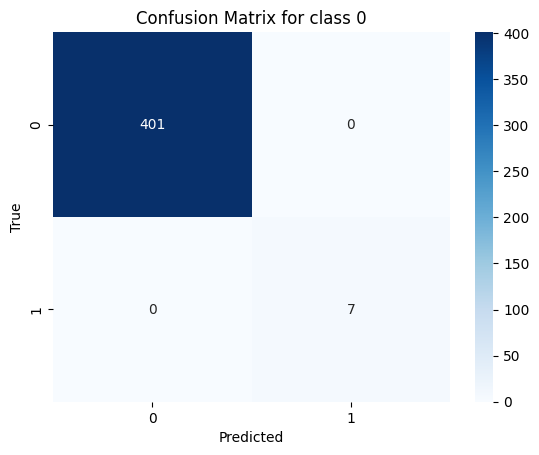

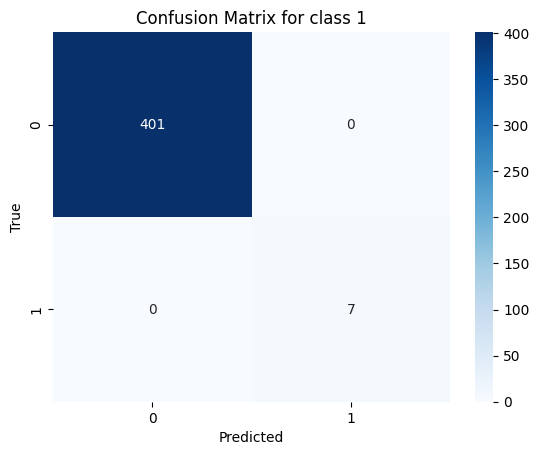

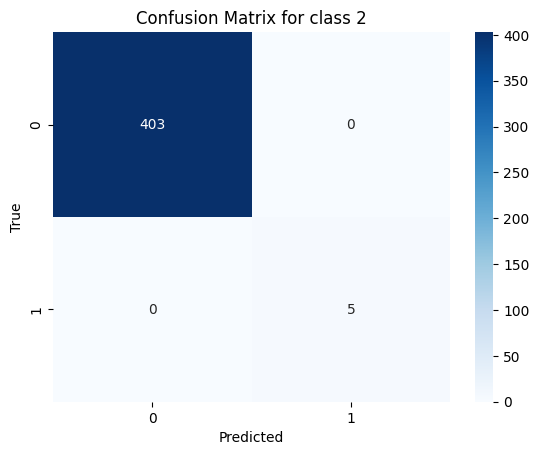

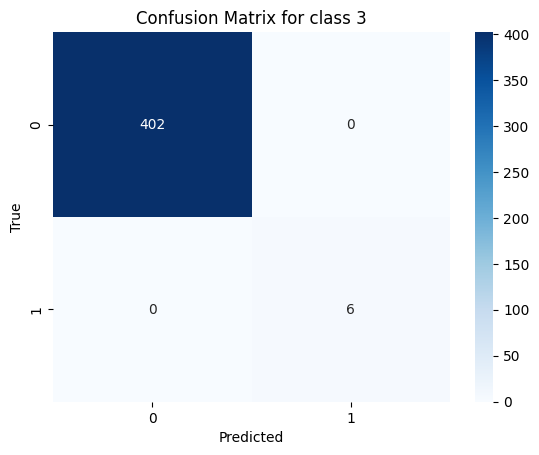

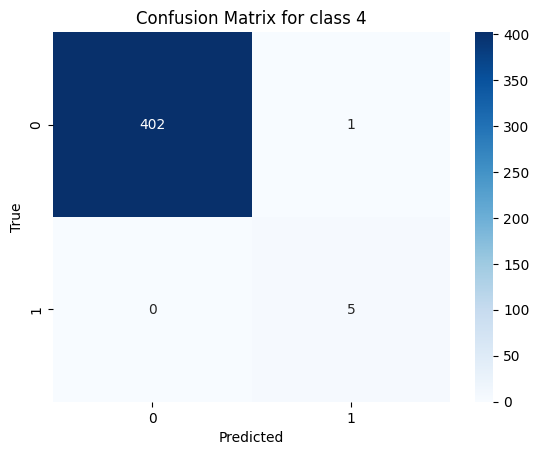

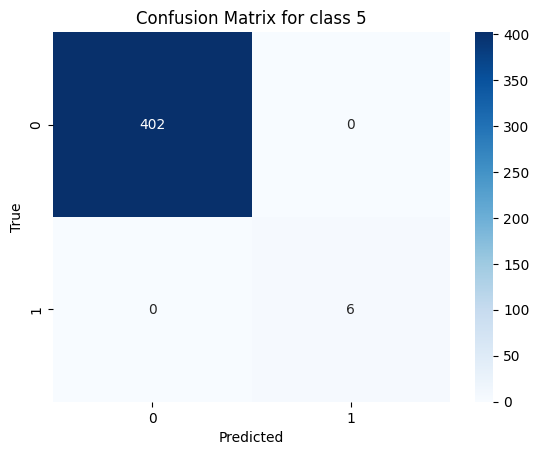

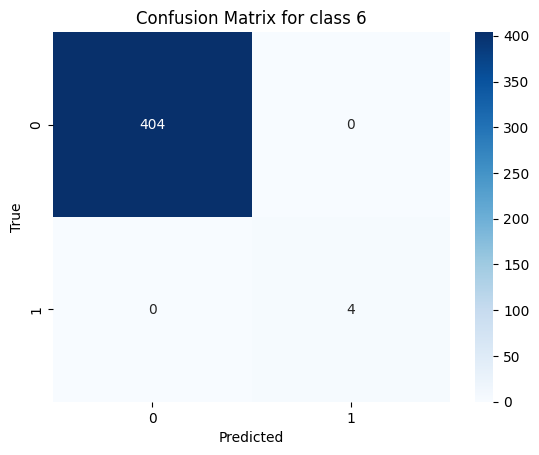

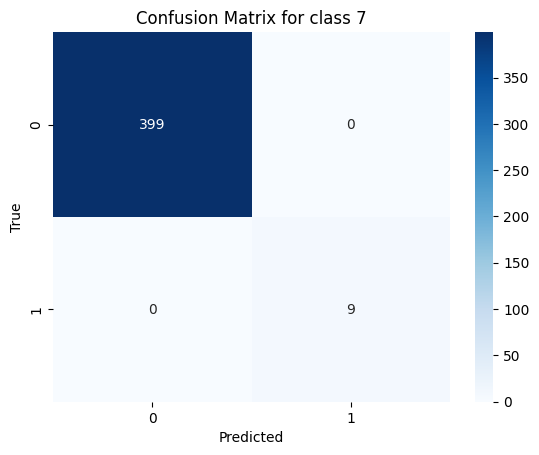

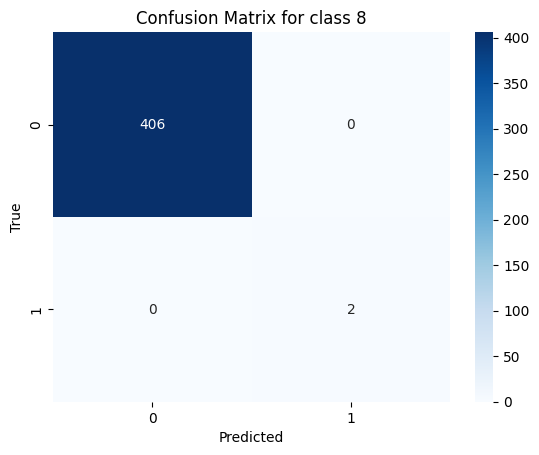

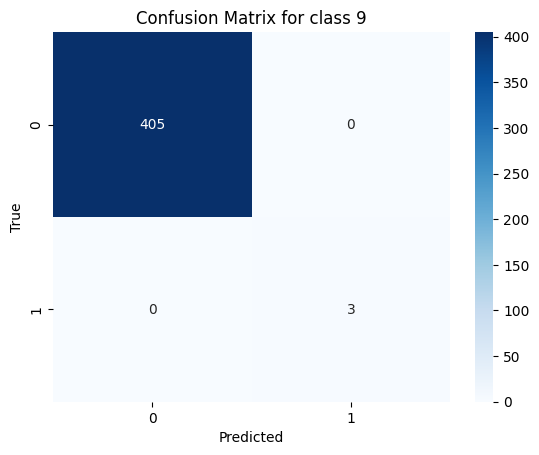

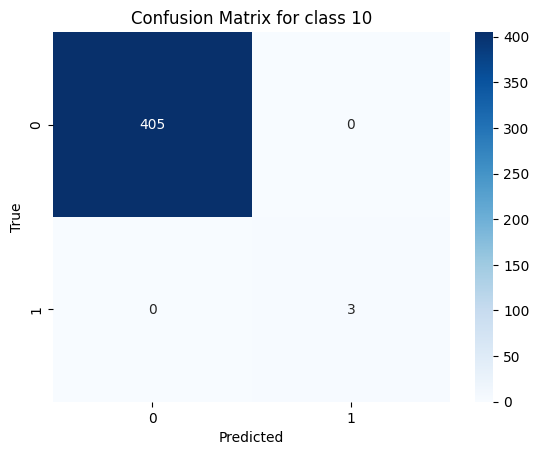

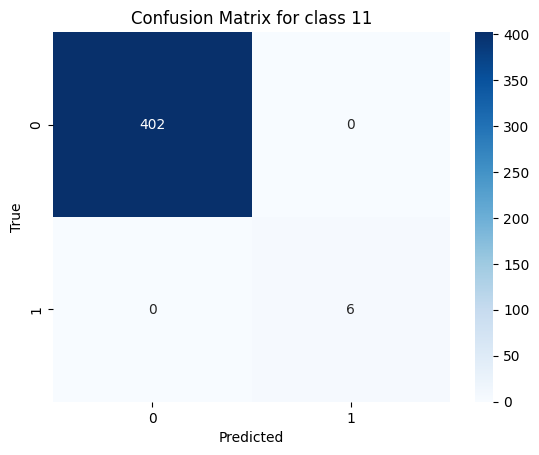

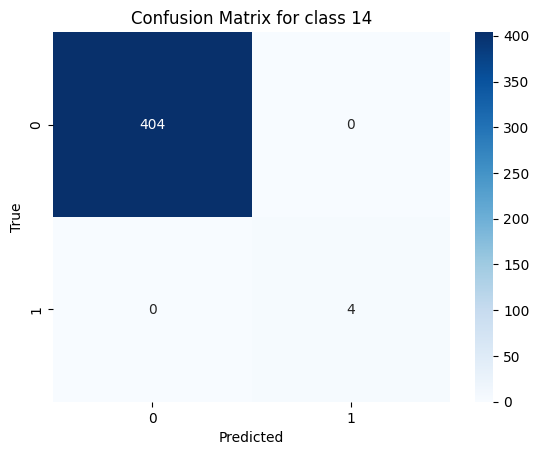

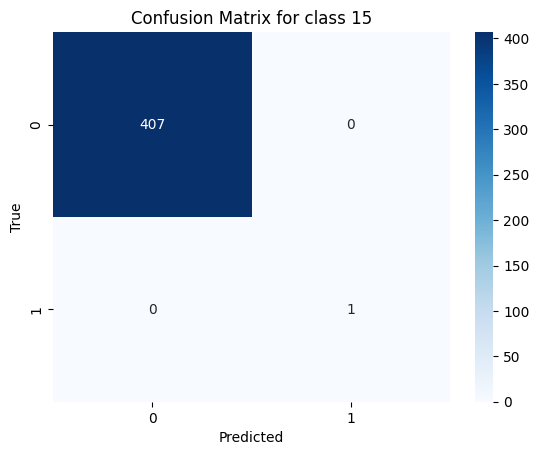

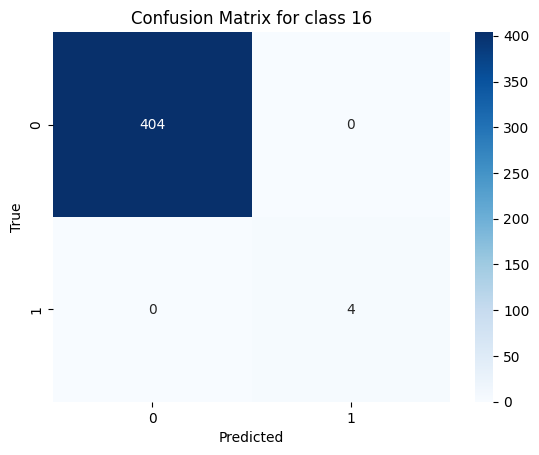

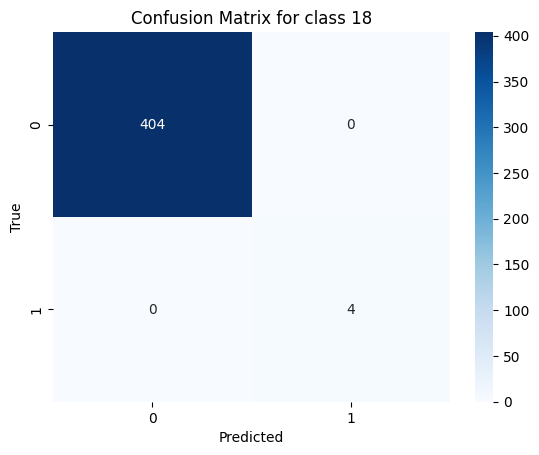

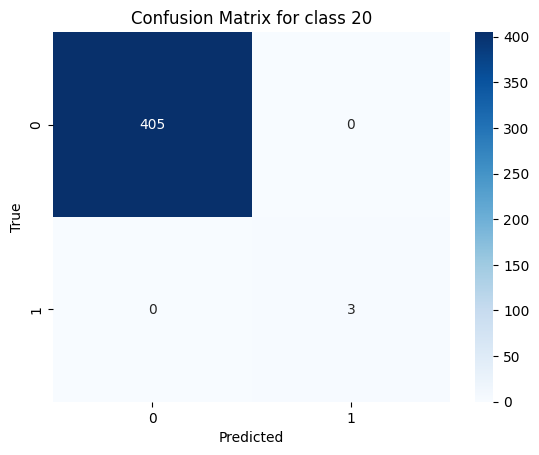

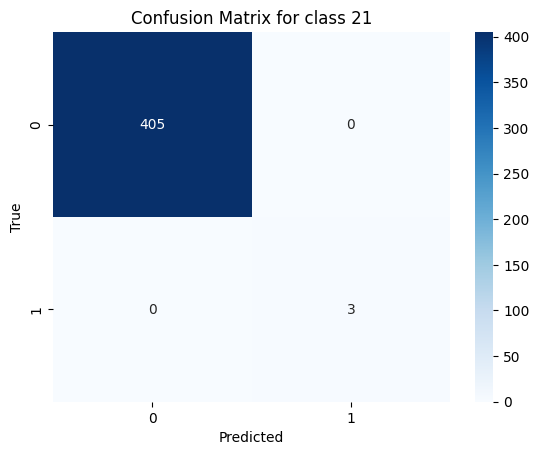

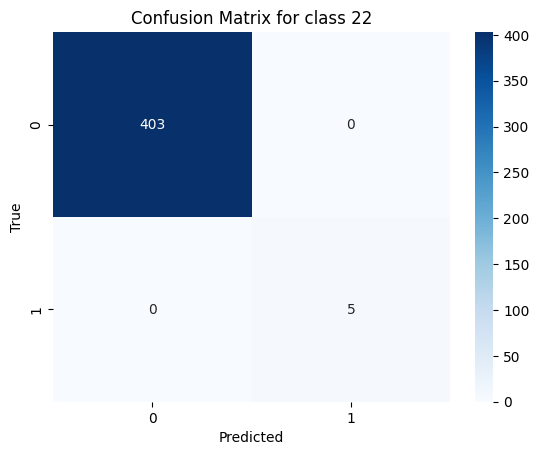

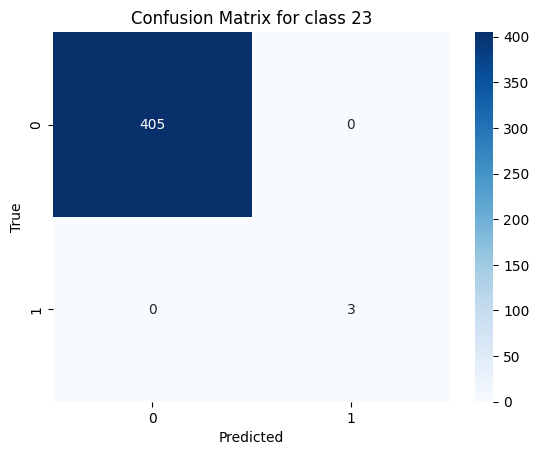

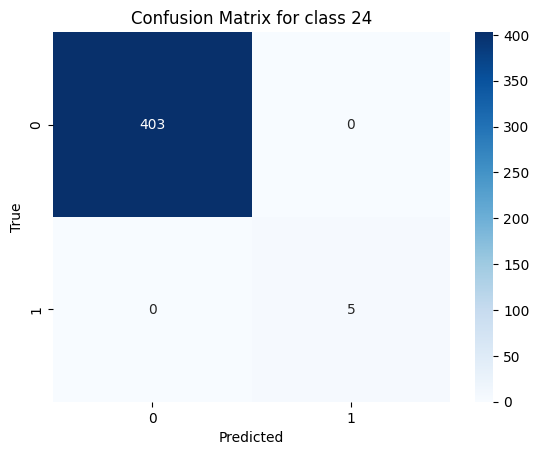

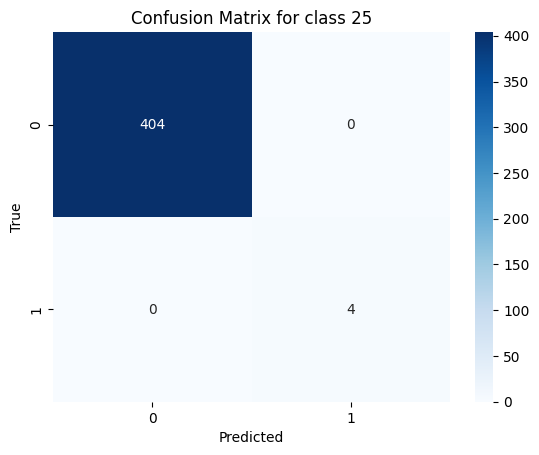

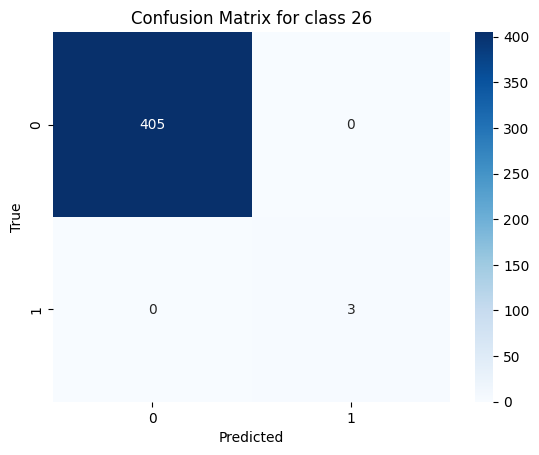

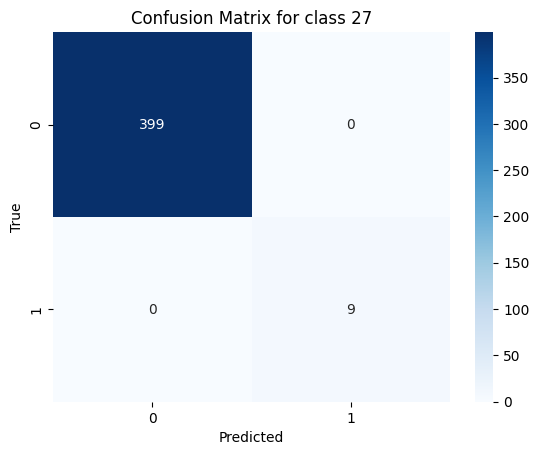

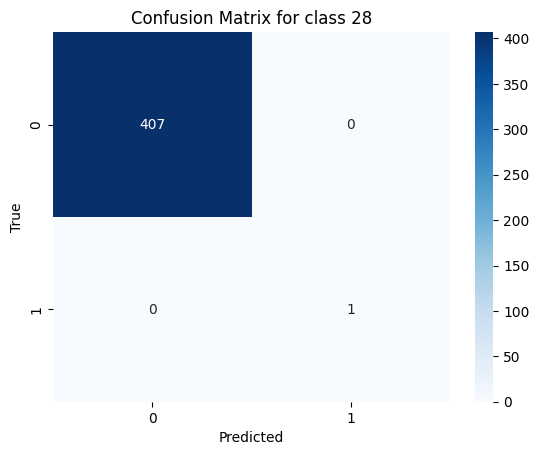

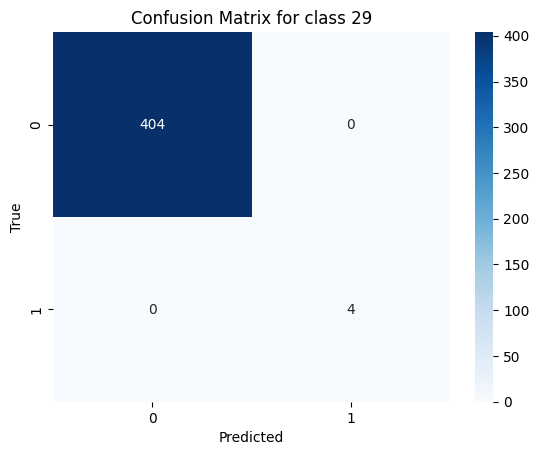

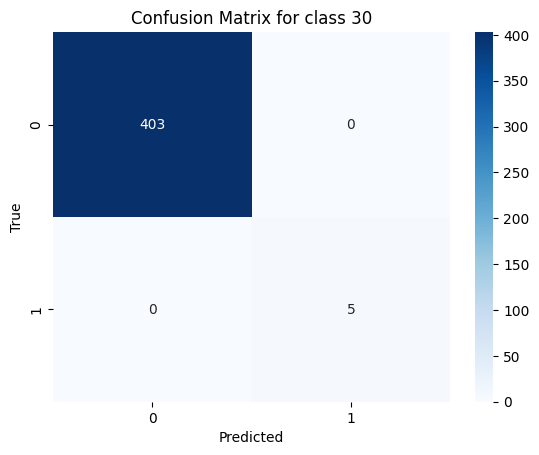

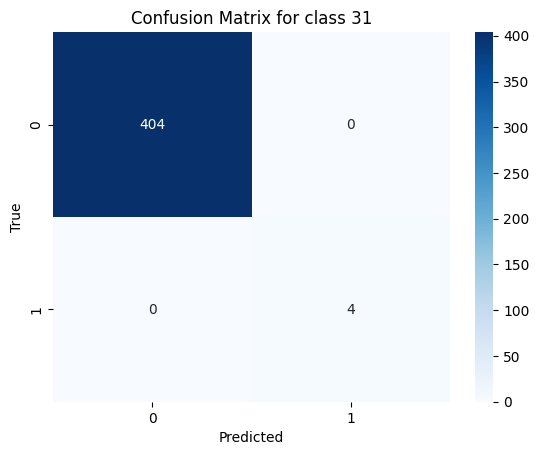

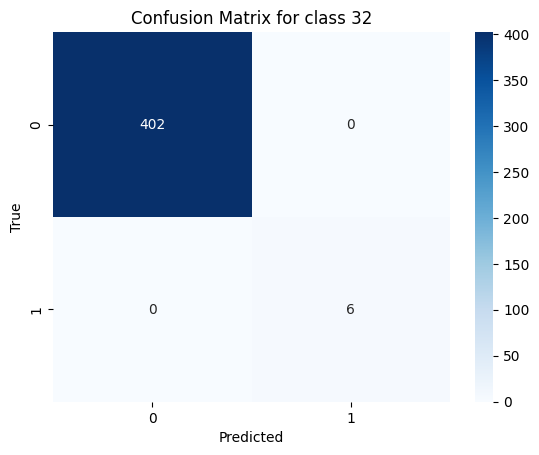

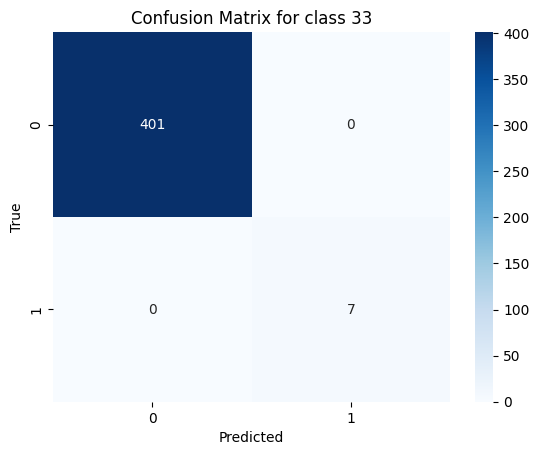

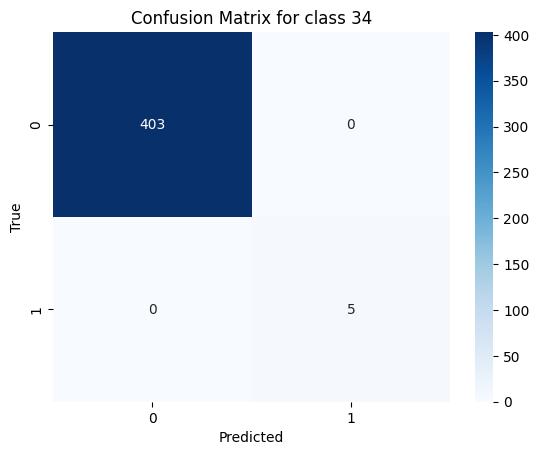

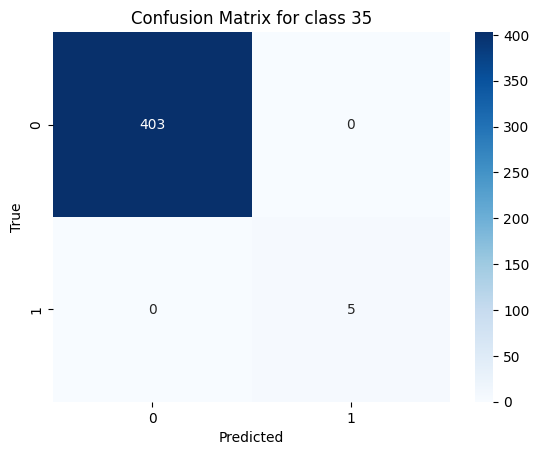

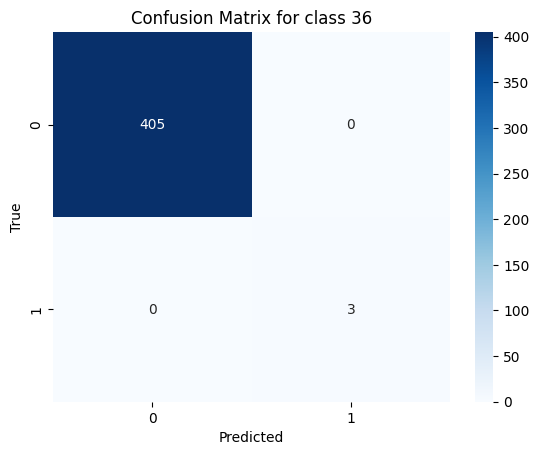

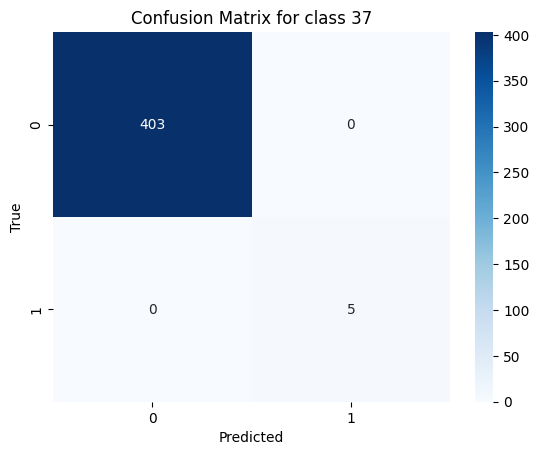

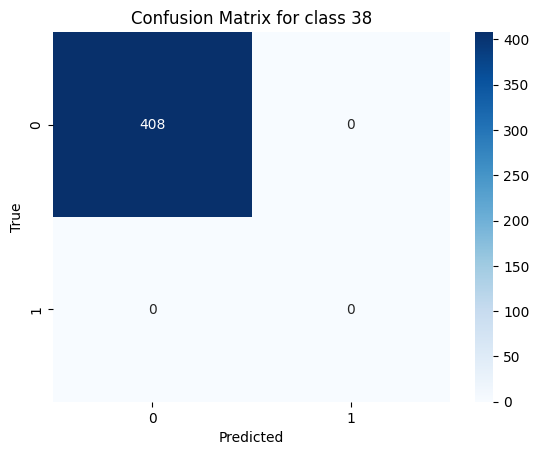

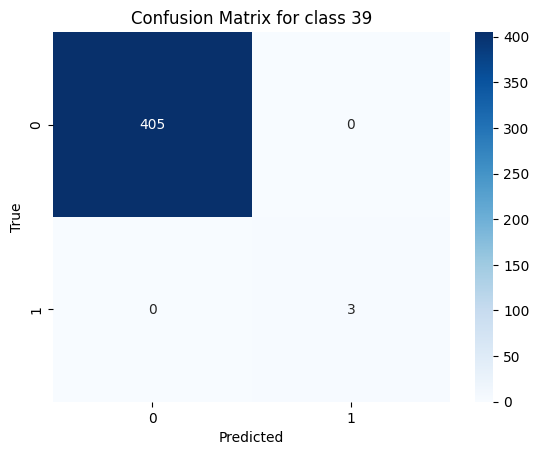

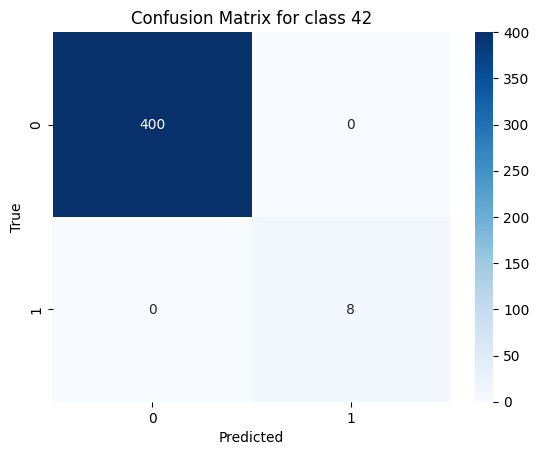

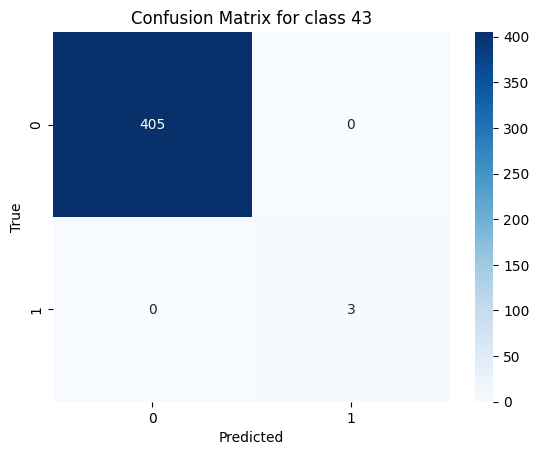

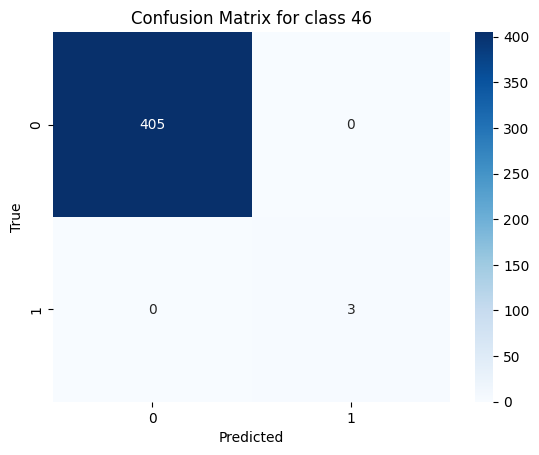

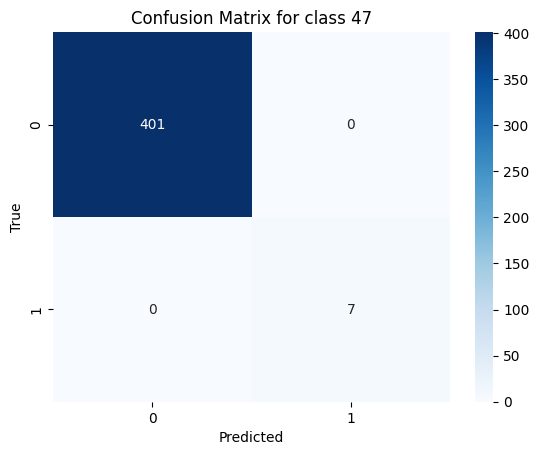

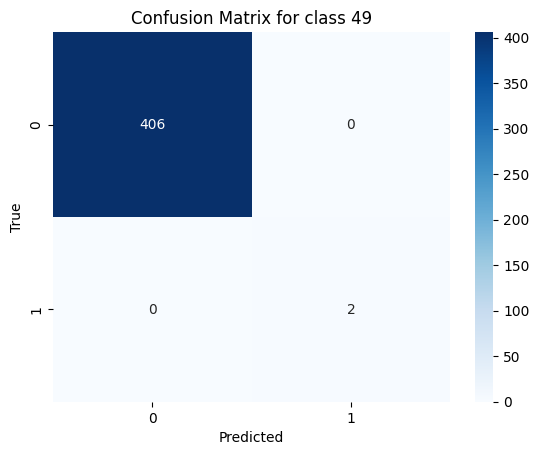

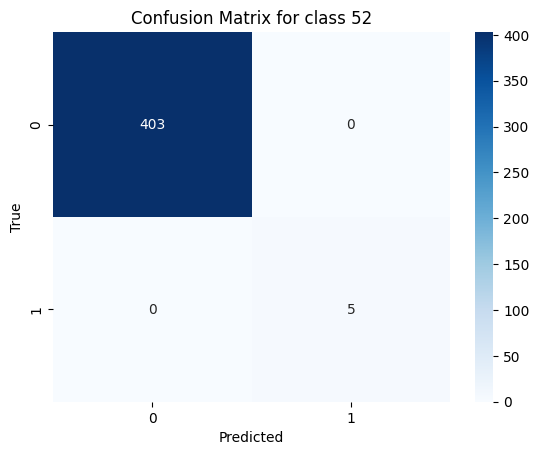

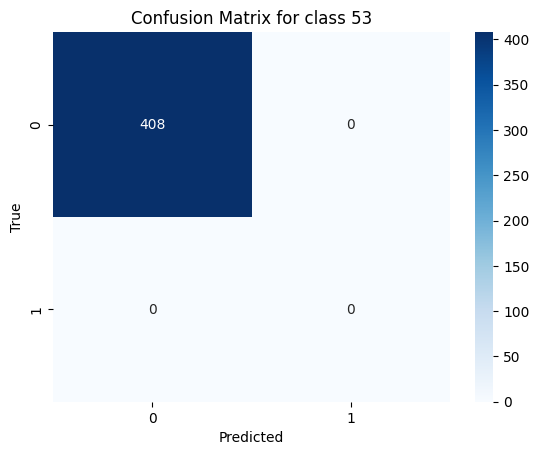

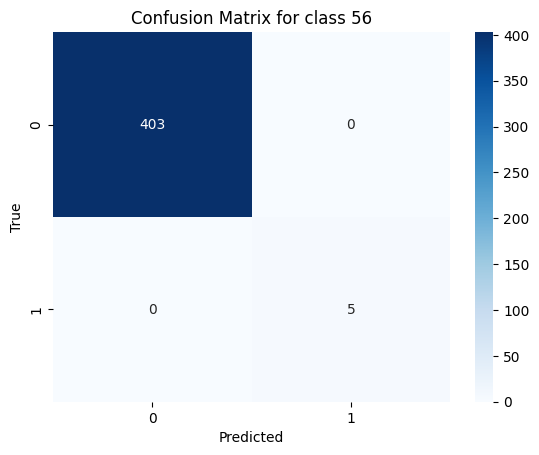

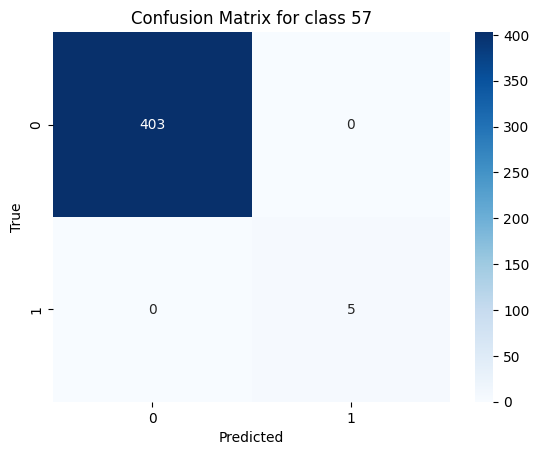

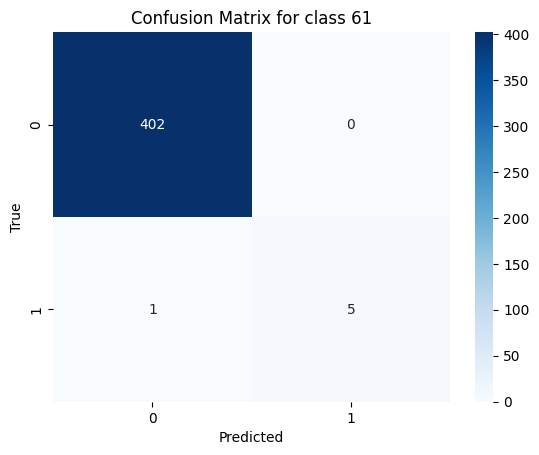

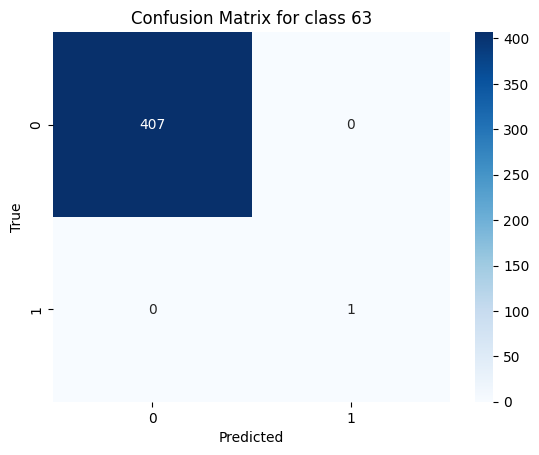

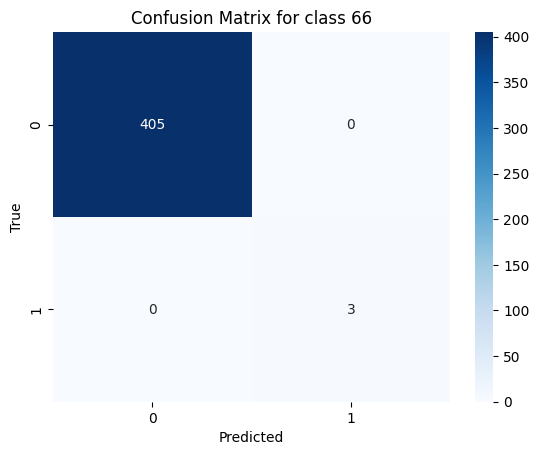

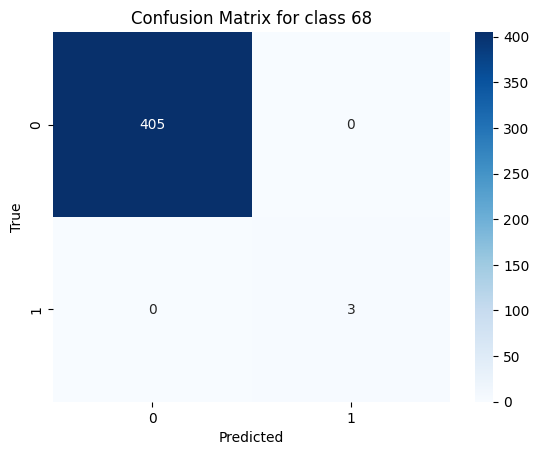

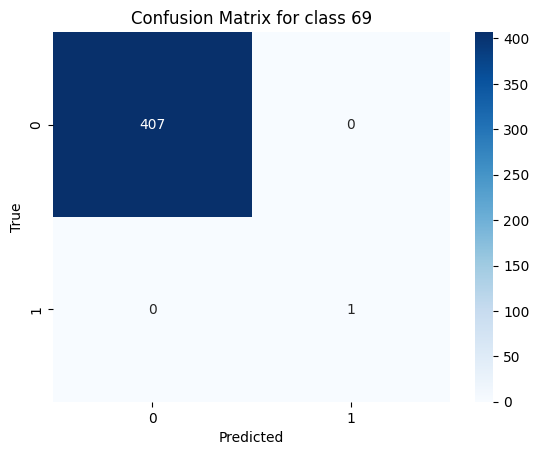

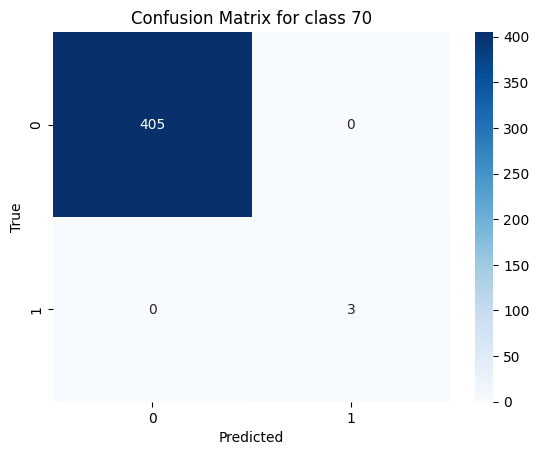

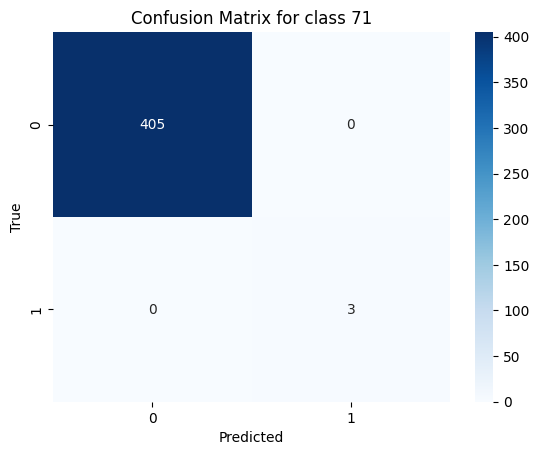

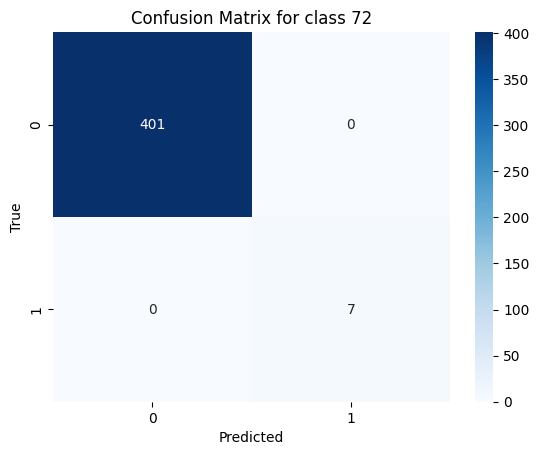

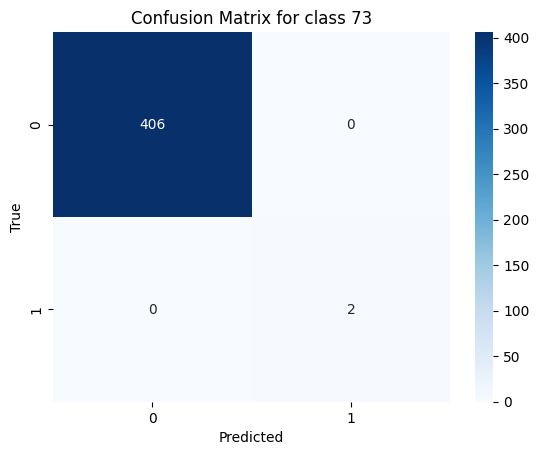

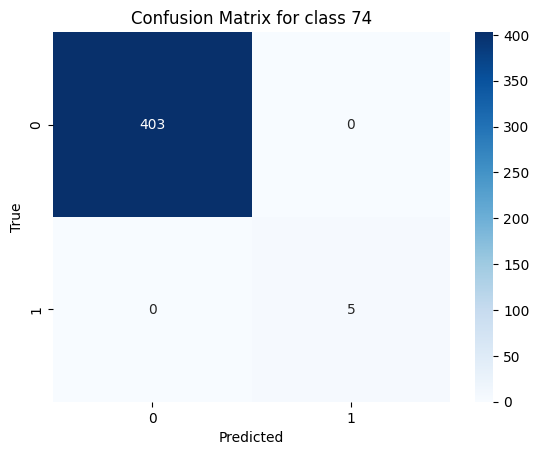

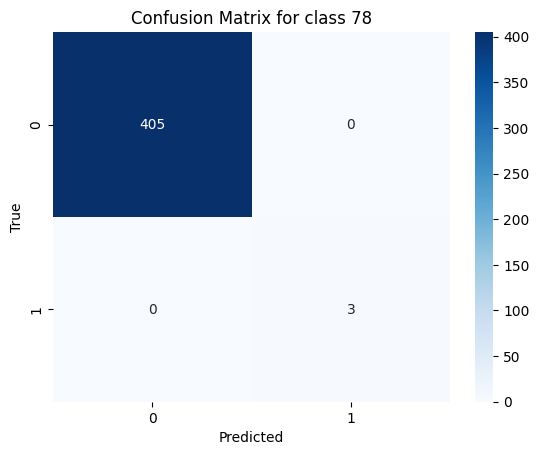

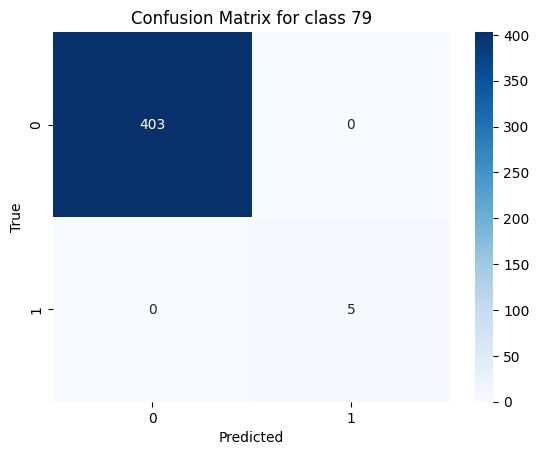

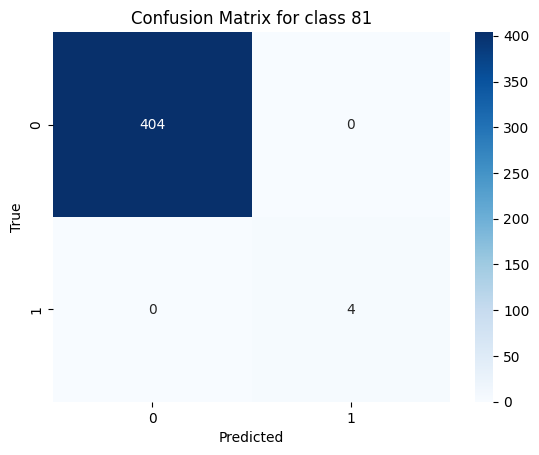

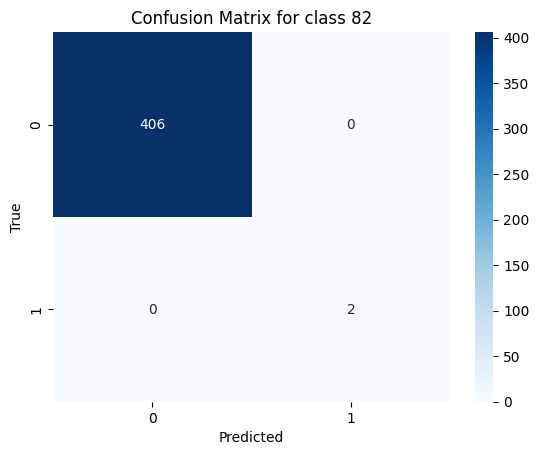

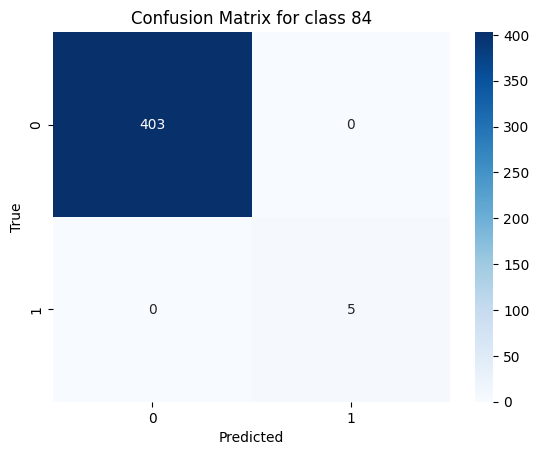

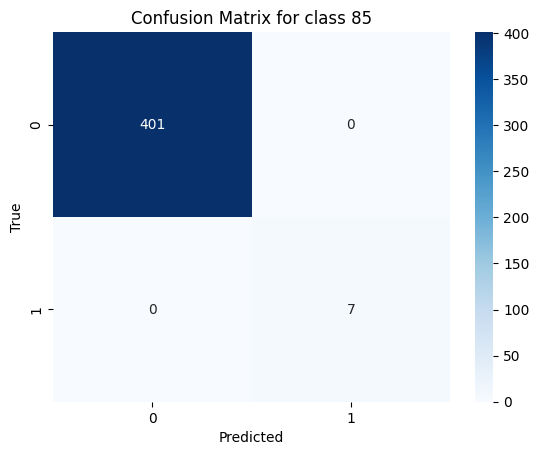

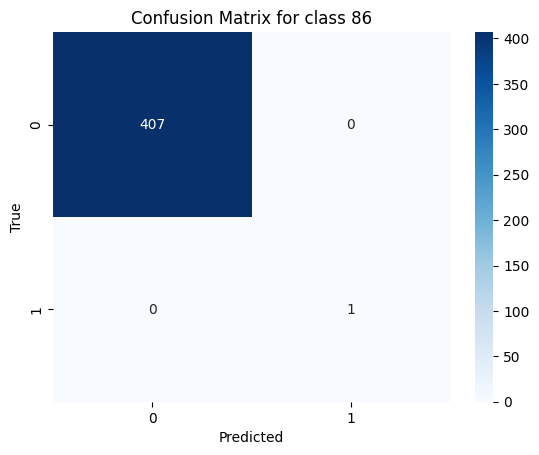

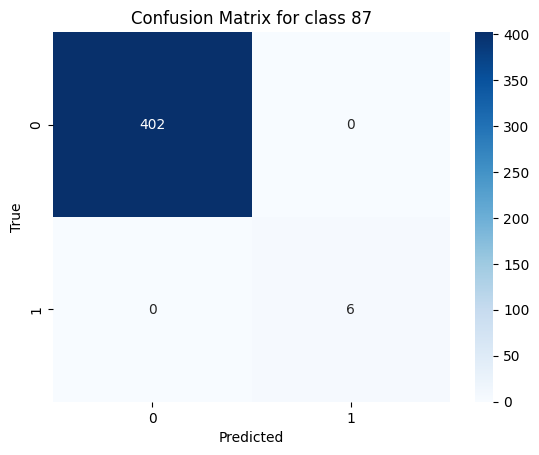

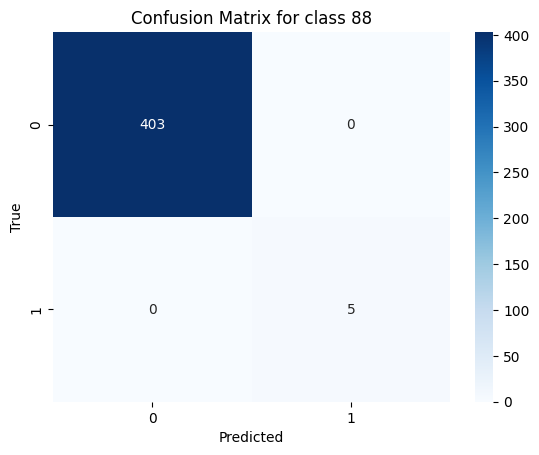

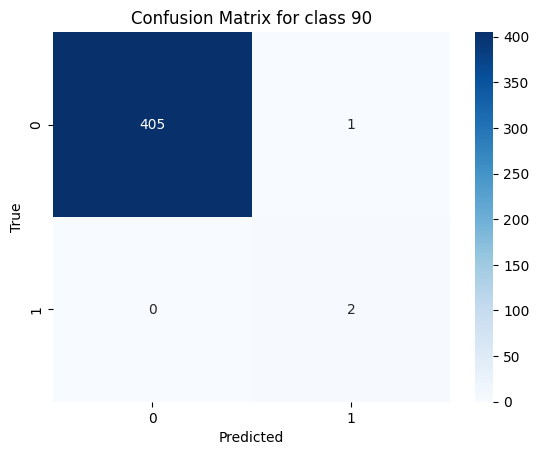

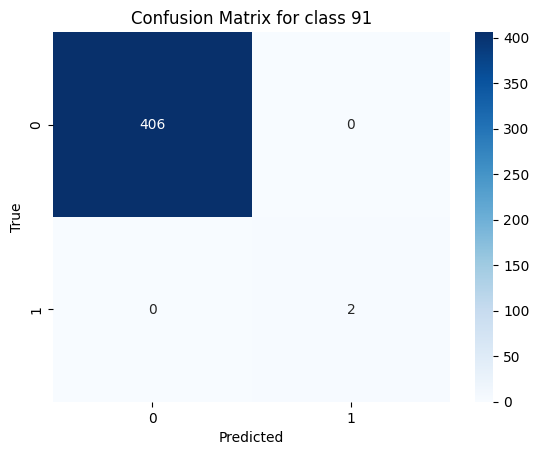

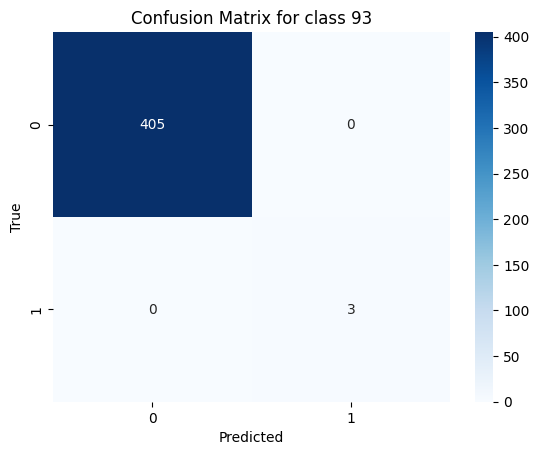

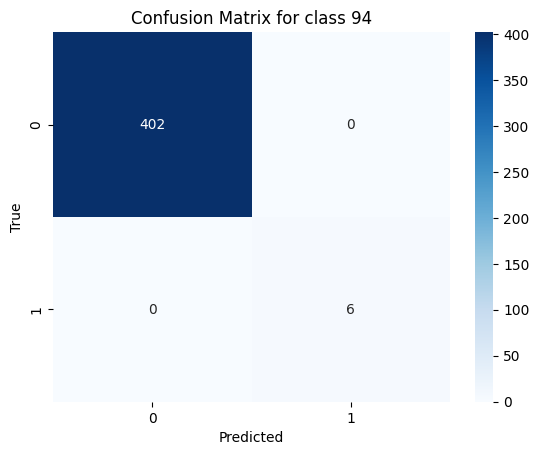

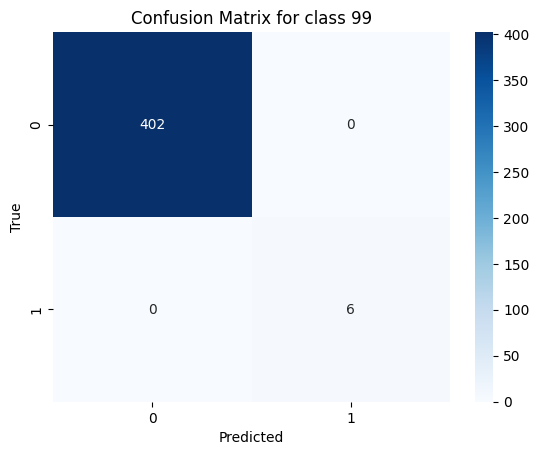

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert ytrue and yhat to one-hot encoding
num_classes = y_test.shape[1]
ytrue_onehot = np.eye(num_classes)[ytrue]
yhat_onehot = np.eye(num_classes)[yhat]

cm = multilabel_confusion_matrix(ytrue_onehot, yhat_onehot)
for i, matrix in enumerate(cm):
    plt.figure()
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for class {i}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [113]:
accuracy_score(ytrue, yhat)

0.9950980392156863

# 11. Test in Real Time

In [17]:
!pip install pillow arabic-reshaper python-bidi

In [18]:
from scipy import stats
from PIL import Image, ImageDraw, ImageFont
import arabic_reshaper
from bidi.algorithm import get_display

In [19]:
def prob_viz(res, actions, input_frame):
    """Visualize top 5 predictions with probabilities"""
    output_frame = input_frame.copy()
    
    # Get top 5 predictions
    top_indices = np.argsort(res)[-5:][::-1]
    top_probs = res[top_indices]
    top_actions = [actions[i] for i in top_indices]
    
    # Display top 5 predictions
    for num, (action, prob) in enumerate(zip(top_actions, top_probs)):
        # Color gradient from green (high) to red (low)
        color = (int(245 * (1-prob)), int(117 + 138*prob), 16)
        
        # Draw colored rectangle (probability bar)
        cv2.rectangle(output_frame, (0, 60+num*35), (int(prob*300), 85+num*35), color, -1)
        
        # Draw Arabic text with PIL
        text_to_display = f"{action}: {prob:.2f}"
        output_frame = draw_arabic_text(output_frame, text_to_display, (5, 60+num*35), 
                                       font_size=20, color=(255, 255, 255))
    
    return output_frame

def draw_arabic_text(image, text, position, font_size=32, color=(255, 255, 255)):
    """Draw Arabic text on image using PIL"""
    # Convert BGR to RGB
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(pil_image)
    
    try:
        # Try to load Arial font (supports Arabic)
        font = ImageFont.truetype("arial.ttf", font_size)
    except:
        # Fallback to default font
        font = ImageFont.load_default()
    
    # Reshape Arabic text for proper display
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    
    # Draw text
    draw.text(position, bidi_text, font=font, fill=color)
    
    # Convert back to BGR
    return cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

In [46]:
sample = X_test[0]
image = np.zeros((480, 640, 3), dtype=np.uint8)  # dummy image for visualization
res = model.predict(np.expand_dims(sample, axis=0))[0]

plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(prob_viz(res, action_names, image), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print(f"\nActual action: {action_names[np.argmax(y_test[0])]}")
print(f"\nPredicted action: {action_names[np.argmax(res)]}")
print(f"Confidence: {np.max(res):.2%}")

NameError: name 'X_test' is not defined

In [21]:
# 1. New detection variables
sequence = [] #########
sentence = [] ##########
predictions = []
threshold = 0.8 ############

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)###############
        sequence.append(keypoints)################
        sequence = sequence[-30:]################
        
        if len(sequence) == 30:###############
            res = model.predict(np.expand_dims(sequence, axis=0))[0] #########
            print(action_names[np.argmax(res)]) ###########
            predictions.append(np.argmax(res)) 
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    current_sign = action_names[np.argmax(res)]
                    # Only add if not already in sentence (prevents duplicates)
                    if current_sign not in sentence:
                        sentence.append(current_sign)

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, action_names, image)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        
        # Draw Arabic sentence using PIL
        if len(sentence) > 0:
            sentence_text = ' '.join(sentence)
            image = draw_arabic_text(image, sentence_text, (3, 5), font_size=28, color=(255, 255, 255))
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [129]:
X_test[0].shape

(30, 1662)

In [130]:
np.expand_dims(X_test[0], axis=0).shape

(1, 30, 1662)

# 12. Test Model on Specific Video

In [31]:
# Test model with specific video
test_video_path = r"E:\KArSL-502\01\test\0071-0170\0162\03_01_0162_(17_04_17_18_28_42)_c.mp4"

# Expected action for this video (action ID 0166)
expected_action_id = '0166'
expected_action_name = sign_mapping.get(expected_action_id, expected_action_id)

print(f"Testing video: {test_video_path}")
print(f"Expected action: {expected_action_id} - {expected_action_name}")
print("=" * 70)

# Initialize variables for detection
sequence = []
sentence = []
predictions = []
threshold = 0.8

# Open the video
cap = cv2.VideoCapture(test_video_path)

if not cap.isOpened():
    print("Error: Could not open video file!")
else:
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    print(f"Video info: {total_frames} frames @ {fps:.2f} FPS")
    print("\nProcessing video... Press 'q' to quit early\n")
    
    frame_count = 0
    
    # Set mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            # Read frame
            ret, frame = cap.read()
            
            if not ret:
                print("\nEnd of video reached")
                break
            
            frame_count += 1
            
            # Make detections
            image, results = mediapipe_detection(frame, holistic)
            
            # Draw landmarks
            draw_styled_landmarks(image, results)
            
            # Extract keypoints and build sequence
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-30:]  # Keep only last 30 frames
            
            # Make prediction once we have 30 frames
            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0), verbose=0)[0]
                predicted_idx = np.argmax(res)
                predicted_action = action_names[predicted_idx]
                confidence = res[predicted_idx]
                
                predictions.append(predicted_idx)
                
                # Add to sentence if stable and confident
                if len(predictions) >= 10:
                    if np.unique(predictions[-10:])[0] == predicted_idx:
                        if confidence > threshold:
                            if predicted_action not in sentence:
                                sentence.append(predicted_action)
                                print(f"Frame {frame_count}: Detected '{predicted_action}' with {confidence:.2%} confidence")
                
                if len(sentence) > 5:
                    sentence = sentence[-5:]
                
                # Visualize predictions
                image = prob_viz(res, action_names, image)
            
            # Draw top bar
            cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
            
            # Draw sentence
            if len(sentence) > 0:
                sentence_text = ' '.join(sentence)
                image = draw_arabic_text(image, sentence_text, (3, 5), font_size=28, color=(255, 255, 255))
            
            # Add frame counter
            cv2.putText(image, f'Frame: {frame_count}/{total_frames}', (10, image.shape[0] - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
            
            # Resize for better viewing (scale down to 50%)
            display_height, display_width = image.shape[:2]
            display_image = cv2.resize(image, (display_width // 2, display_height // 2))
            
            # Show frame
            cv2.imshow('Video Test - Sign Language Detection', display_image)
            
            # Break if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                print("\nStopped by user")
                break
    
    cap.release()
    cv2.destroyAllWindows()
    
    print("\n" + "=" * 70)
    print("RESULTS:")
    print(f"Expected sign: {expected_action_name}")
    print(f"Detected signs: {sentence}")
    print(f"\nDetection successful: {'✓' if expected_action_name in sentence else '✗'}")
    print("=" * 70)

Testing video: E:\KArSL-502\01\test\0071-0170\0162\03_01_0162_(17_04_17_18_28_42)_c.mp4
Expected action: 0166 - يشم
Video info: 46 frames @ 30.00 FPS

Processing video... Press 'q' to quit early

Frame 39: Detected 'ينام' with 99.99% confidence

End of video reached

RESULTS:
Expected sign: يشم
Detected signs: ['ينام']

Detection successful: ✗


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'CUDA Version: {torch.version.cuda}')
    print(f'Memory Allocated: {torch.cuda.memory_allocated(0) / 1024**2:.2f} MB')
    print(f'Memory Cached: {torch.cuda.memory_reserved(0) / 1024**2:.2f} MB')

# Define PyTorch Dataset
class SignLanguageDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.FloatTensor(sequences)
        self.labels = torch.LongTensor(labels)
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# Define PyTorch LSTM Model
class SignLanguageLSTM(nn.Module):
    def __init__(self, input_size=1662, hidden_size=128, num_layers=2, num_classes=100, dropout=0.4):
        super(SignLanguageLSTM, self).__init__()
        
        # Bidirectional LSTM layers
        self.lstm1 = nn.LSTM(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.bn1 = nn.BatchNorm1d(hidden_size * 2)
        self.dropout1 = nn.Dropout(dropout)
        
        self.lstm2 = nn.LSTM(hidden_size * 2, 64, batch_first=True)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(dropout)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(128, 64)
        self.dropout4 = nn.Dropout(0.3)
        
        self.fc3 = nn.Linear(64, num_classes)
    
    def forward(self, x):
        # x shape: (batch, seq_len, input_size)
        lstm_out, _ = self.lstm1(x)
        lstm_out = self.bn1(lstm_out[:, -1, :])  # Take last output
        lstm_out = self.dropout1(lstm_out)
        
        # Reshape for second LSTM
        lstm_out = lstm_out.unsqueeze(1).repeat(1, x.size(1), 1)
        lstm_out, _ = self.lstm2(lstm_out)
        lstm_out = self.bn2(lstm_out[:, -1, :])
        lstm_out = self.dropout2(lstm_out)
        
        # Dense layers
        out = F.relu(self.fc1(lstm_out))
        out = self.bn3(out)
        out = self.dropout3(out)
        
        out = F.relu(self.fc2(out))
        out = self.dropout4(out)
        
        out = self.fc3(out)
        return out

# Prepare data
y_train_indices = np.argmax(y_train, axis=1)
y_test_indices = np.argmax(y_test, axis=1)

train_dataset = SignLanguageDataset(X_train, y_train_indices)
test_dataset = SignLanguageDataset(X_test, y_test_indices)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize model
pytorch_model = SignLanguageLSTM(num_classes=len(actions)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.001, weight_decay=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=20, verbose=True)

print(f'\n✓ PyTorch model created for {len(actions)} action classes')
print(f'  - Model parameters: {sum(p.numel() for p in pytorch_model.parameters()):,}')
print(f'  - Trainable parameters: {sum(p.numel() for p in pytorch_model.parameters() if p.requires_grad):,}')
print(f'\nReady to train on {device}!')